<a href="https://colab.research.google.com/github/ParisaEb/Computer-Vision/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms


In [6]:
tensor_transforms=transforms.Compose([transforms.ToTensor()])
train_data= torchvision.datasets.CIFAR10(root='/.data',train=True,download=True,transform=tensor_transforms)
validation_data= torchvision.datasets.CIFAR10(root='/.data',train=False,download=True,transform=tensor_transforms)


100%|██████████| 170498071/170498071 [00:01<00:00, 104777016.65it/s]


Extracting /.data/cifar-10-python.tar.gz to /.data
Files already downloaded and verified


In [158]:
train_data,validation_data

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: /.data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: /.data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [159]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [160]:
display(train_data[7][0])

tensor([[[0.1098, 0.1176, 0.1294,  ..., 0.1686, 0.2039, 0.1804],
         [0.1059, 0.1059, 0.0824,  ..., 0.4392, 0.4588, 0.4510],
         [0.1333, 0.1294, 0.0941,  ..., 0.6863, 0.6941, 0.6902],
         ...,
         [0.5569, 0.5569, 0.5882,  ..., 0.5255, 0.5020, 0.5255],
         [0.5490, 0.5686, 0.5882,  ..., 0.5137, 0.5098, 0.4784],
         [0.5255, 0.5333, 0.5333,  ..., 0.4157, 0.4078, 0.3961]],

        [[0.1373, 0.1333, 0.1725,  ..., 0.2196, 0.2510, 0.2275],
         [0.1176, 0.1098, 0.1216,  ..., 0.5333, 0.5490, 0.5412],
         [0.1412, 0.1294, 0.1176,  ..., 0.8157, 0.8196, 0.8157],
         ...,
         [0.6902, 0.6902, 0.7216,  ..., 0.6863, 0.6588, 0.6863],
         [0.6902, 0.7059, 0.7294,  ..., 0.6667, 0.6667, 0.6353],
         [0.6706, 0.6706, 0.6706,  ..., 0.5647, 0.5569, 0.5490]],

        [[0.1529, 0.1725, 0.1843,  ..., 0.1765, 0.2078, 0.1843],
         [0.1490, 0.1608, 0.1529,  ..., 0.3804, 0.3961, 0.3922],
         [0.1647, 0.1686, 0.1569,  ..., 0.5608, 0.5647, 0.

In [161]:
for i in range(100):
  display (train_data[i][0])


tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

tensor([[[0.6039, 0.4941, 0.4118,  ..., 0.3569, 0.3412, 0.3098],
         [0.5490, 0.5686, 0.4902,  ..., 0.3765, 0.3020, 0.2784],
         [0.5490, 0.5451, 0.4510,  ..., 0.3098, 0.2667, 0.2627],
         ...,
         [0.6863, 0.6118, 0.6039,  ..., 0.1647, 0.2392, 0.3647],
         [0.6471, 0.6118, 0.6235,  ..., 0.4039, 0.4824, 0.5137],
         [0.6392, 0.6196, 0.6392,  ..., 0.5608, 0.5608, 0.5608]],

        [[0.6941, 0.5373, 0.4078,  ..., 0.3725, 0.3529, 0.3176],
         [0.6275, 0.6000, 0.4902,  ..., 0.3882, 0.3137, 0.2863],
         [0.6078, 0.5725, 0.4510,  ..., 0.3216, 0.2745, 0.2706],
         ...,
         [0.6549, 0.6039, 0.6275,  ..., 0.1333, 0.2078, 0.3255],
         [0.6039, 0.5961, 0.6314,  ..., 0.3647, 0.4471, 0.4745],
         [0.5804, 0.5804, 0.6118,  ..., 0.5216, 0.5255, 0.5216]],

        [[0.7333, 0.5333, 0.3725,  ..., 0.2784, 0.2784, 0.2745],
         [0.6627, 0.6039, 0.4627,  ..., 0.3059, 0.2431, 0.2392],
         [0.6431, 0.5843, 0.4392,  ..., 0.2510, 0.2157, 0.

tensor([[[1.0000, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.4431, 0.4353, 0.4118,  ..., 0.2824, 0.2824, 0.2824],
         [0.4353, 0.4078, 0.3882,  ..., 0.2667, 0.2745, 0.3059],
         [0.4157, 0.3882, 0.3725,  ..., 0.3059, 0.3098, 0.3137]],

        [[1.0000, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.4706, 0.4627, 0.4392,  ..., 0.3176, 0.3137, 0.3137],
         [0.4627, 0.4353, 0.4157,  ..., 0.2941, 0.2980, 0.3294],
         [0.4431, 0.4157, 0.4000,  ..., 0.3333, 0.3333, 0.3373]],

        [[1.0000, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.

tensor([[[0.1098, 0.1451, 0.1490,  ..., 0.2980, 0.3176, 0.3333],
         [0.1294, 0.1333, 0.1255,  ..., 0.3725, 0.3765, 0.3333],
         [0.1529, 0.1569, 0.2235,  ..., 0.3647, 0.4196, 0.3725],
         ...,
         [0.3255, 0.3412, 0.3294,  ..., 0.3882, 0.3529, 0.3176],
         [0.3451, 0.3529, 0.3647,  ..., 0.3137, 0.2980, 0.3216],
         [0.3804, 0.3686, 0.3647,  ..., 0.2118, 0.2471, 0.2824]],

        [[0.0980, 0.1333, 0.1373,  ..., 0.2627, 0.2824, 0.2980],
         [0.1098, 0.1176, 0.1059,  ..., 0.3216, 0.3216, 0.2824],
         [0.1255, 0.1294, 0.1961,  ..., 0.2980, 0.3490, 0.3020],
         ...,
         [0.2863, 0.3020, 0.2902,  ..., 0.3647, 0.3294, 0.2941],
         [0.2824, 0.2902, 0.3020,  ..., 0.2902, 0.2745, 0.2980],
         [0.3059, 0.2941, 0.2941,  ..., 0.1843, 0.2196, 0.2549]],

        [[0.0392, 0.0745, 0.0784,  ..., 0.1529, 0.1686, 0.1843],
         [0.0510, 0.0549, 0.0471,  ..., 0.2157, 0.2196, 0.1765],
         [0.0588, 0.0667, 0.1294,  ..., 0.2039, 0.2588, 0.

tensor([[[0.6667, 0.6588, 0.6941,  ..., 0.6353, 0.6196, 0.6157],
         [0.6588, 0.6745, 0.6706,  ..., 0.6235, 0.6118, 0.6039],
         [0.6039, 0.5843, 0.5059,  ..., 0.6314, 0.6157, 0.6039],
         ...,
         [0.2902, 0.2980, 0.3059,  ..., 0.2784, 0.2667, 0.2392],
         [0.2667, 0.2706, 0.2824,  ..., 0.2980, 0.2784, 0.2784],
         [0.2627, 0.2667, 0.2706,  ..., 0.2941, 0.2784, 0.2863]],

        [[0.7059, 0.6980, 0.7255,  ..., 0.7020, 0.6980, 0.6941],
         [0.7098, 0.7255, 0.7176,  ..., 0.6941, 0.6902, 0.6824],
         [0.6667, 0.6471, 0.5647,  ..., 0.6980, 0.6941, 0.6824],
         ...,
         [0.3294, 0.3333, 0.3333,  ..., 0.2941, 0.2824, 0.2549],
         [0.2980, 0.3020, 0.3098,  ..., 0.3137, 0.2941, 0.2941],
         [0.2941, 0.2980, 0.2941,  ..., 0.3098, 0.2941, 0.3020]],

        [[0.7765, 0.7686, 0.7961,  ..., 0.8431, 0.8392, 0.8314],
         [0.7765, 0.7882, 0.7843,  ..., 0.8314, 0.8275, 0.8196],
         [0.7294, 0.7098, 0.6353,  ..., 0.8392, 0.8314, 0.

tensor([[[0.6235, 0.5882, 0.6000,  ..., 0.3569, 0.2902, 0.2980],
         [0.5569, 0.5725, 0.6078,  ..., 0.4980, 0.4784, 0.3373],
         [0.4275, 0.3882, 0.4118,  ..., 0.5373, 0.6392, 0.3647],
         ...,
         [0.9569, 0.9412, 0.9451,  ..., 0.6118, 0.7020, 0.7843],
         [0.9647, 0.9529, 0.9529,  ..., 0.6353, 0.6980, 0.7529],
         [0.9647, 0.9529, 0.9569,  ..., 0.6510, 0.6784, 0.7137]],

        [[0.4000, 0.3569, 0.3725,  ..., 0.2784, 0.2471, 0.2275],
         [0.2941, 0.2824, 0.2980,  ..., 0.4118, 0.4353, 0.2706],
         [0.2627, 0.2275, 0.2314,  ..., 0.4392, 0.5176, 0.2824],
         ...,
         [0.5059, 0.4824, 0.4784,  ..., 0.1647, 0.2314, 0.2863],
         [0.5216, 0.5020, 0.4980,  ..., 0.1725, 0.2196, 0.2549],
         [0.5451, 0.5216, 0.5176,  ..., 0.1843, 0.2000, 0.2235]],

        [[0.3961, 0.3725, 0.3804,  ..., 0.2196, 0.2157, 0.2157],
         [0.2667, 0.2588, 0.2549,  ..., 0.2784, 0.3647, 0.2392],
         [0.2941, 0.2353, 0.2039,  ..., 0.3137, 0.4118, 0.

tensor([[[0.6431, 0.4118, 0.4627,  ..., 0.4275, 0.4235, 0.3569],
         [0.6549, 0.4549, 0.2824,  ..., 0.4118, 0.4118, 0.3490],
         [0.5490, 0.5569, 0.4667,  ..., 0.4078, 0.3294, 0.3059],
         ...,
         [0.5451, 0.5569, 0.5294,  ..., 0.3490, 0.3804, 0.4941],
         [0.6392, 0.6000, 0.5725,  ..., 0.3333, 0.3843, 0.4980],
         [0.7176, 0.6902, 0.6039,  ..., 0.3686, 0.3569, 0.4784]],

        [[0.8078, 0.5490, 0.5804,  ..., 0.5765, 0.5765, 0.5059],
         [0.8353, 0.6275, 0.4275,  ..., 0.5569, 0.5569, 0.4980],
         [0.7490, 0.7569, 0.6392,  ..., 0.5451, 0.4706, 0.4510],
         ...,
         [0.5804, 0.6078, 0.6118,  ..., 0.5255, 0.5804, 0.6902],
         [0.6157, 0.6431, 0.6431,  ..., 0.5098, 0.5804, 0.6980],
         [0.6000, 0.7137, 0.6039,  ..., 0.5255, 0.5216, 0.6667]],

        [[0.3294, 0.2392, 0.3961,  ..., 0.2863, 0.2706, 0.2235],
         [0.3294, 0.1922, 0.1686,  ..., 0.3098, 0.2824, 0.2235],
         [0.2549, 0.2588, 0.3098,  ..., 0.3294, 0.2275, 0.

tensor([[[0.1098, 0.1176, 0.1294,  ..., 0.1686, 0.2039, 0.1804],
         [0.1059, 0.1059, 0.0824,  ..., 0.4392, 0.4588, 0.4510],
         [0.1333, 0.1294, 0.0941,  ..., 0.6863, 0.6941, 0.6902],
         ...,
         [0.5569, 0.5569, 0.5882,  ..., 0.5255, 0.5020, 0.5255],
         [0.5490, 0.5686, 0.5882,  ..., 0.5137, 0.5098, 0.4784],
         [0.5255, 0.5333, 0.5333,  ..., 0.4157, 0.4078, 0.3961]],

        [[0.1373, 0.1333, 0.1725,  ..., 0.2196, 0.2510, 0.2275],
         [0.1176, 0.1098, 0.1216,  ..., 0.5333, 0.5490, 0.5412],
         [0.1412, 0.1294, 0.1176,  ..., 0.8157, 0.8196, 0.8157],
         ...,
         [0.6902, 0.6902, 0.7216,  ..., 0.6863, 0.6588, 0.6863],
         [0.6902, 0.7059, 0.7294,  ..., 0.6667, 0.6667, 0.6353],
         [0.6706, 0.6706, 0.6706,  ..., 0.5647, 0.5569, 0.5490]],

        [[0.1529, 0.1725, 0.1843,  ..., 0.1765, 0.2078, 0.1843],
         [0.1490, 0.1608, 0.1529,  ..., 0.3804, 0.3961, 0.3922],
         [0.1647, 0.1686, 0.1569,  ..., 0.5608, 0.5647, 0.

tensor([[[0.5255, 0.5137, 0.5020,  ..., 0.4980, 0.4980, 0.5020],
         [0.5216, 0.5059, 0.5020,  ..., 0.4980, 0.4980, 0.5020],
         [0.5020, 0.4980, 0.5020,  ..., 0.4941, 0.4941, 0.4941],
         ...,
         [0.6824, 0.6706, 0.6078,  ..., 0.1059, 0.1137, 0.1098],
         [0.7608, 0.7412, 0.6235,  ..., 0.1176, 0.1176, 0.1176],
         [0.7569, 0.7098, 0.6588,  ..., 0.1216, 0.1255, 0.1255]],

        [[0.7294, 0.7216, 0.7137,  ..., 0.7098, 0.7098, 0.7137],
         [0.7412, 0.7294, 0.7294,  ..., 0.7176, 0.7176, 0.7216],
         [0.7255, 0.7137, 0.7137,  ..., 0.7098, 0.7098, 0.7059],
         ...,
         [0.8157, 0.8078, 0.7412,  ..., 0.3686, 0.3765, 0.3686],
         [0.8667, 0.8431, 0.7686,  ..., 0.3725, 0.3765, 0.3725],
         [0.8510, 0.8157, 0.7882,  ..., 0.3686, 0.3686, 0.3686]],

        [[0.8745, 0.8627, 0.8549,  ..., 0.8706, 0.8706, 0.8745],
         [0.8941, 0.8784, 0.8784,  ..., 0.8784, 0.8784, 0.8824],
         [0.8863, 0.8745, 0.8745,  ..., 0.8706, 0.8706, 0.

tensor([[[0.4902, 0.4314, 0.4000,  ..., 0.7922, 0.7843, 0.7922],
         [0.5569, 0.5725, 0.6902,  ..., 0.7647, 0.7765, 0.8000],
         [0.7059, 0.5608, 0.6118,  ..., 0.4784, 0.5451, 0.6196],
         ...,
         [0.4078, 0.3961, 0.3961,  ..., 0.4941, 0.4941, 0.4902],
         [0.4078, 0.4118, 0.4275,  ..., 0.5412, 0.5373, 0.5373],
         [0.4118, 0.4235, 0.4510,  ..., 0.5608, 0.5608, 0.5647]],

        [[0.4902, 0.3961, 0.3529,  ..., 0.8118, 0.8039, 0.8157],
         [0.5725, 0.5647, 0.6745,  ..., 0.7882, 0.8039, 0.8275],
         [0.7255, 0.5725, 0.6157,  ..., 0.4353, 0.5020, 0.5765],
         ...,
         [0.3216, 0.3137, 0.3176,  ..., 0.4039, 0.4039, 0.3961],
         [0.3176, 0.3294, 0.3451,  ..., 0.4431, 0.4431, 0.4392],
         [0.3255, 0.3412, 0.3686,  ..., 0.4588, 0.4549, 0.4549]],

        [[0.4549, 0.3569, 0.3255,  ..., 0.8392, 0.8314, 0.8392],
         [0.5569, 0.5451, 0.6667,  ..., 0.8039, 0.8196, 0.8431],
         [0.7176, 0.5725, 0.6157,  ..., 0.4431, 0.5137, 0.

tensor([[[0.2078, 0.2118, 0.2196,  ..., 0.1843, 0.1608, 0.0941],
         [0.1804, 0.2078, 0.2118,  ..., 0.1647, 0.1529, 0.1098],
         [0.1765, 0.1961, 0.1804,  ..., 0.1490, 0.1412, 0.1137],
         ...,
         [0.2784, 0.2902, 0.3137,  ..., 0.2000, 0.1804, 0.1922],
         [0.2941, 0.3098, 0.3176,  ..., 0.2392, 0.2510, 0.1882],
         [0.3333, 0.3333, 0.3373,  ..., 0.2392, 0.2510, 0.1922]],

        [[0.2549, 0.2471, 0.2353,  ..., 0.2000, 0.1765, 0.1098],
         [0.2314, 0.2431, 0.2314,  ..., 0.1804, 0.1686, 0.1255],
         [0.2314, 0.2353, 0.2039,  ..., 0.1647, 0.1569, 0.1294],
         ...,
         [0.3255, 0.3255, 0.3333,  ..., 0.2118, 0.1922, 0.1961],
         [0.3216, 0.3333, 0.3333,  ..., 0.2549, 0.2627, 0.1961],
         [0.3255, 0.3294, 0.3373,  ..., 0.2549, 0.2627, 0.1961]],

        [[0.2078, 0.2039, 0.1961,  ..., 0.1961, 0.1725, 0.1059],
         [0.1608, 0.1765, 0.1725,  ..., 0.1765, 0.1647, 0.1216],
         [0.1490, 0.1608, 0.1333,  ..., 0.1608, 0.1529, 0.

tensor([[[0.5569, 0.6745, 0.6902,  ..., 0.8471, 0.7765, 0.8039],
         [0.7490, 0.7686, 0.6824,  ..., 0.8980, 0.8706, 0.8510],
         [0.8627, 0.8510, 0.7529,  ..., 0.8784, 0.8824, 0.8549],
         ...,
         [0.7725, 0.7686, 0.7882,  ..., 0.7843, 0.7804, 0.8039],
         [0.7686, 0.7490, 0.7569,  ..., 0.7765, 0.7804, 0.7882],
         [0.7294, 0.7137, 0.6824,  ..., 0.6196, 0.6196, 0.6392]],

        [[0.5843, 0.6745, 0.6588,  ..., 0.8314, 0.7608, 0.7922],
         [0.7451, 0.7529, 0.6510,  ..., 0.8706, 0.8431, 0.8235],
         [0.8314, 0.8196, 0.7176,  ..., 0.8392, 0.8392, 0.8157],
         ...,
         [0.5961, 0.5961, 0.6118,  ..., 0.6471, 0.6471, 0.6431],
         [0.6157, 0.5961, 0.6039,  ..., 0.6431, 0.6471, 0.6314],
         [0.5882, 0.5765, 0.5451,  ..., 0.4863, 0.4902, 0.4902]],

        [[0.5961, 0.6549, 0.6039,  ..., 0.8275, 0.7569, 0.7843],
         [0.7529, 0.7451, 0.6235,  ..., 0.8627, 0.8353, 0.8118],
         [0.8314, 0.8157, 0.7137,  ..., 0.8196, 0.8235, 0.

tensor([[[0.6431, 0.6353, 0.6353,  ..., 0.6157, 0.6000, 0.6000],
         [0.6588, 0.6510, 0.6510,  ..., 0.6431, 0.6275, 0.6196],
         [0.6745, 0.6667, 0.6706,  ..., 0.6588, 0.6471, 0.6392],
         ...,
         [0.4824, 0.4588, 0.4392,  ..., 0.4588, 0.3725, 0.4706],
         [0.4706, 0.4549, 0.4392,  ..., 0.4941, 0.4706, 0.4706],
         [0.4745, 0.4706, 0.4549,  ..., 0.4863, 0.4863, 0.4706]],

        [[0.8431, 0.8314, 0.8314,  ..., 0.8235, 0.8157, 0.7961],
         [0.8549, 0.8431, 0.8431,  ..., 0.8314, 0.8196, 0.8039],
         [0.8627, 0.8510, 0.8549,  ..., 0.8314, 0.8157, 0.8118],
         ...,
         [0.6275, 0.6039, 0.5843,  ..., 0.5333, 0.4510, 0.5843],
         [0.6118, 0.5922, 0.5765,  ..., 0.5843, 0.5647, 0.5961],
         [0.6039, 0.5961, 0.5804,  ..., 0.5961, 0.6039, 0.6039]],

        [[0.9569, 0.9412, 0.9412,  ..., 0.9294, 0.9216, 0.9176],
         [0.9608, 0.9490, 0.9490,  ..., 0.9333, 0.9255, 0.9216],
         [0.9647, 0.9529, 0.9569,  ..., 0.9333, 0.9216, 0.

tensor([[[0.0667, 0.0667, 0.0667,  ..., 0.0902, 0.0863, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0941, 0.0902, 0.0863],
         [0.0706, 0.0706, 0.0745,  ..., 0.0941, 0.0902, 0.0902],
         ...,
         [0.8510, 0.8863, 0.8235,  ..., 0.1294, 0.1255, 0.1294],
         [0.8588, 0.8706, 0.8392,  ..., 0.1373, 0.1333, 0.1294],
         [0.8235, 0.8667, 0.8431,  ..., 0.1412, 0.1333, 0.1255]],

        [[0.0118, 0.0118, 0.0078,  ..., 0.0510, 0.0471, 0.0353],
         [0.0157, 0.0157, 0.0157,  ..., 0.0549, 0.0510, 0.0471],
         [0.0157, 0.0157, 0.0196,  ..., 0.0549, 0.0510, 0.0510],
         ...,
         [0.8392, 0.8588, 0.7882,  ..., 0.0941, 0.0902, 0.0941],
         [0.8431, 0.8431, 0.8157,  ..., 0.1020, 0.0980, 0.0941],
         [0.8157, 0.8471, 0.8314,  ..., 0.1059, 0.0980, 0.0902]],

        [[0.0078, 0.0078, 0.0039,  ..., 0.0431, 0.0392, 0.0275],
         [0.0118, 0.0118, 0.0118,  ..., 0.0471, 0.0431, 0.0392],
         [0.0118, 0.0118, 0.0157,  ..., 0.0471, 0.0431, 0.

tensor([[[0.3922, 0.3843, 0.3882,  ..., 0.6471, 0.6392, 0.6471],
         [0.3961, 0.3922, 0.3922,  ..., 0.6431, 0.6392, 0.6235],
         [0.4118, 0.4078, 0.4078,  ..., 0.6118, 0.5333, 0.4471],
         ...,
         [0.6510, 0.6510, 0.6588,  ..., 0.5373, 0.5373, 0.5765],
         [0.6314, 0.6353, 0.6549,  ..., 0.5137, 0.5412, 0.5373],
         [0.6431, 0.6353, 0.6431,  ..., 0.6000, 0.6157, 0.6118]],

        [[0.5725, 0.5647, 0.5647,  ..., 0.6471, 0.6392, 0.6471],
         [0.5686, 0.5608, 0.5608,  ..., 0.6314, 0.6353, 0.6314],
         [0.5765, 0.5686, 0.5686,  ..., 0.5882, 0.5216, 0.4588],
         ...,
         [0.6118, 0.6118, 0.6157,  ..., 0.4980, 0.4941, 0.5333],
         [0.5961, 0.6000, 0.6196,  ..., 0.4902, 0.5216, 0.5176],
         [0.6196, 0.6118, 0.6196,  ..., 0.5725, 0.5922, 0.5882]],

        [[0.7529, 0.7412, 0.7412,  ..., 0.6471, 0.6392, 0.6471],
         [0.7373, 0.7294, 0.7294,  ..., 0.6235, 0.6235, 0.6157],
         [0.7412, 0.7294, 0.7333,  ..., 0.5765, 0.5059, 0.

tensor([[[0.3922, 0.3922, 0.3961,  ..., 0.3725, 0.3686, 0.3725],
         [0.4039, 0.4039, 0.4078,  ..., 0.3804, 0.3804, 0.3804],
         [0.4196, 0.4157, 0.4157,  ..., 0.3922, 0.3922, 0.3961],
         ...,
         [0.6471, 0.6235, 0.6549,  ..., 0.2941, 0.2941, 0.2824],
         [0.6196, 0.6784, 0.7137,  ..., 0.2980, 0.2941, 0.3020],
         [0.6314, 0.6353, 0.6275,  ..., 0.3843, 0.5059, 0.6353]],

        [[0.6588, 0.6588, 0.6549,  ..., 0.6471, 0.6471, 0.6549],
         [0.6667, 0.6588, 0.6588,  ..., 0.6549, 0.6510, 0.6588],
         [0.6824, 0.6745, 0.6784,  ..., 0.6667, 0.6667, 0.6745],
         ...,
         [0.6980, 0.6667, 0.6941,  ..., 0.4588, 0.4706, 0.4706],
         [0.6824, 0.7294, 0.7569,  ..., 0.4667, 0.4667, 0.4745],
         [0.6902, 0.6902, 0.6706,  ..., 0.5373, 0.6275, 0.7255]],

        [[0.9059, 0.8980, 0.9020,  ..., 0.9059, 0.8941, 0.8980],
         [0.9020, 0.8941, 0.8863,  ..., 0.8980, 0.8902, 0.8980],
         [0.9137, 0.9020, 0.8980,  ..., 0.9020, 0.9020, 0.

tensor([[[0.9216, 0.9216, 0.9294,  ..., 0.9137, 0.8902, 0.8745],
         [0.9059, 0.9098, 0.9176,  ..., 0.9059, 0.8824, 0.8667],
         [0.9059, 0.9137, 0.9294,  ..., 0.9098, 0.8824, 0.8667],
         ...,
         [0.4902, 0.4941, 0.5608,  ..., 0.2588, 0.2549, 0.2667],
         [0.4980, 0.5529, 0.5843,  ..., 0.2471, 0.2627, 0.2431],
         [0.5373, 0.5569, 0.5843,  ..., 0.2431, 0.2392, 0.2000]],

        [[0.9255, 0.9255, 0.9333,  ..., 0.9176, 0.9020, 0.8941],
         [0.9098, 0.9137, 0.9216,  ..., 0.9098, 0.8941, 0.8824],
         [0.9098, 0.9176, 0.9333,  ..., 0.9137, 0.8941, 0.8863],
         ...,
         [0.4863, 0.4902, 0.5569,  ..., 0.3490, 0.3373, 0.3255],
         [0.4902, 0.5490, 0.5804,  ..., 0.3490, 0.3451, 0.3098],
         [0.5294, 0.5490, 0.5765,  ..., 0.3529, 0.3294, 0.2667]],

        [[0.9333, 0.9333, 0.9412,  ..., 0.9255, 0.9137, 0.9098],
         [0.9176, 0.9216, 0.9294,  ..., 0.9176, 0.9098, 0.9137],
         [0.9176, 0.9255, 0.9412,  ..., 0.9216, 0.9098, 0.

tensor([[[0.4314, 0.5569, 0.5922,  ..., 0.1529, 0.1569, 0.1490],
         [0.4275, 0.5529, 0.5961,  ..., 0.1412, 0.1569, 0.1412],
         [0.4118, 0.5569, 0.5922,  ..., 0.1529, 0.1725, 0.1529],
         ...,
         [0.2431, 0.1529, 0.2353,  ..., 0.1647, 0.1804, 0.1843],
         [0.2431, 0.2039, 0.2275,  ..., 0.1686, 0.1843, 0.1922],
         [0.2157, 0.2353, 0.2196,  ..., 0.1765, 0.1843, 0.2000]],

        [[0.4078, 0.5294, 0.5725,  ..., 0.1529, 0.1569, 0.1490],
         [0.4039, 0.5216, 0.5765,  ..., 0.1412, 0.1569, 0.1412],
         [0.3843, 0.5216, 0.5686,  ..., 0.1529, 0.1725, 0.1529],
         ...,
         [0.2314, 0.1490, 0.2510,  ..., 0.1725, 0.1725, 0.1725],
         [0.2235, 0.2000, 0.2392,  ..., 0.1804, 0.1765, 0.1804],
         [0.2000, 0.2353, 0.2353,  ..., 0.1882, 0.1804, 0.1882]],

        [[0.3804, 0.4627, 0.4706,  ..., 0.1529, 0.1569, 0.1490],
         [0.3725, 0.4510, 0.4667,  ..., 0.1451, 0.1569, 0.1412],
         [0.3529, 0.4471, 0.4588,  ..., 0.1608, 0.1765, 0.

tensor([[[0.7725, 0.7765, 0.7882,  ..., 0.8510, 0.8510, 0.8510],
         [0.7569, 0.7647, 0.7765,  ..., 0.8471, 0.8431, 0.8392],
         [0.7529, 0.7608, 0.7725,  ..., 0.8510, 0.8471, 0.8431],
         ...,
         [0.6118, 0.6118, 0.6118,  ..., 0.3843, 0.4588, 0.5020],
         [0.6196, 0.6235, 0.6039,  ..., 0.5137, 0.4588, 0.3569],
         [0.5961, 0.5922, 0.5686,  ..., 0.3569, 0.3529, 0.3098]],

        [[0.7333, 0.7373, 0.7490,  ..., 0.7882, 0.7882, 0.7882],
         [0.7176, 0.7255, 0.7373,  ..., 0.7843, 0.7843, 0.7765],
         [0.7137, 0.7216, 0.7333,  ..., 0.7882, 0.7843, 0.7804],
         ...,
         [0.5725, 0.5725, 0.5725,  ..., 0.3098, 0.3765, 0.4118],
         [0.5804, 0.5843, 0.5647,  ..., 0.4314, 0.3882, 0.2941],
         [0.5569, 0.5529, 0.5294,  ..., 0.2824, 0.2863, 0.2549]],

        [[0.7373, 0.7412, 0.7529,  ..., 0.8000, 0.8000, 0.8000],
         [0.7216, 0.7294, 0.7412,  ..., 0.7961, 0.7922, 0.7882],
         [0.7176, 0.7255, 0.7373,  ..., 0.8000, 0.7961, 0.

tensor([[[0.0902, 0.1843, 0.2039,  ..., 0.5137, 0.7137, 0.8431],
         [0.1255, 0.2000, 0.2196,  ..., 0.5843, 0.8000, 0.8196],
         [0.1608, 0.2314, 0.2353,  ..., 0.5412, 0.7686, 0.7961],
         ...,
         [0.6549, 0.6941, 0.7137,  ..., 0.7804, 0.6902, 0.5686],
         [0.6510, 0.6471, 0.6471,  ..., 0.7176, 0.7176, 0.7412],
         [0.6863, 0.6784, 0.6784,  ..., 0.7451, 0.7373, 0.7529]],

        [[0.1059, 0.1922, 0.1804,  ..., 0.5098, 0.7059, 0.8314],
         [0.1216, 0.1922, 0.1922,  ..., 0.5804, 0.8078, 0.8510],
         [0.1451, 0.2235, 0.2314,  ..., 0.5412, 0.7843, 0.8510],
         ...,
         [0.6549, 0.6941, 0.7137,  ..., 0.7529, 0.6706, 0.5490],
         [0.6510, 0.6471, 0.6471,  ..., 0.7098, 0.7137, 0.7333],
         [0.6863, 0.6784, 0.6784,  ..., 0.7333, 0.7294, 0.7412]],

        [[0.0863, 0.1608, 0.1176,  ..., 0.4588, 0.6824, 0.9020],
         [0.0941, 0.1490, 0.1333,  ..., 0.5216, 0.7725, 0.9098],
         [0.0980, 0.1843, 0.2000,  ..., 0.4902, 0.7608, 0.

tensor([[[0.6000, 0.6824, 0.6078,  ..., 0.4784, 0.5412, 0.3804],
         [0.6275, 0.6431, 0.5882,  ..., 0.5373, 0.6275, 0.4039],
         [0.5490, 0.5765, 0.5333,  ..., 0.4078, 0.4902, 0.3647],
         ...,
         [0.6863, 0.6667, 0.6667,  ..., 0.7569, 0.7725, 0.7804],
         [0.6824, 0.6784, 0.6706,  ..., 0.7843, 0.7922, 0.8157],
         [0.6588, 0.6431, 0.6510,  ..., 0.8000, 0.8000, 0.8078]],

        [[0.6157, 0.7059, 0.6471,  ..., 0.4902, 0.5608, 0.3961],
         [0.6392, 0.6667, 0.6235,  ..., 0.5294, 0.6314, 0.4275],
         [0.5608, 0.5961, 0.5686,  ..., 0.4039, 0.5020, 0.4000],
         ...,
         [0.6941, 0.6745, 0.6745,  ..., 0.7961, 0.8078, 0.8000],
         [0.6941, 0.6902, 0.6824,  ..., 0.8157, 0.8196, 0.8314],
         [0.6784, 0.6627, 0.6706,  ..., 0.8196, 0.8157, 0.8235]],

        [[0.6078, 0.7373, 0.6745,  ..., 0.4824, 0.5529, 0.3804],
         [0.6471, 0.7059, 0.6627,  ..., 0.5059, 0.6157, 0.4196],
         [0.5765, 0.6510, 0.6196,  ..., 0.3882, 0.4902, 0.

tensor([[[0.9882, 0.9765, 0.9804,  ..., 0.9843, 0.9843, 0.9843],
         [1.0000, 0.9882, 0.9922,  ..., 1.0000, 1.0000, 0.9961],
         [0.9922, 0.9804, 0.9804,  ..., 0.9961, 0.9961, 0.9882],
         ...,
         [0.9961, 0.9882, 0.9922,  ..., 0.9882, 0.9922, 0.9882],
         [0.9804, 0.9882, 1.0000,  ..., 0.9961, 1.0000, 0.9961],
         [0.9255, 0.9765, 0.9804,  ..., 0.9804, 0.9804, 0.9843]],

        [[0.0314, 0.0588, 0.0314,  ..., 0.0039, 0.0000, 0.0039],
         [0.0275, 0.0588, 0.0510,  ..., 0.0039, 0.0000, 0.0157],
         [0.0235, 0.0627, 0.0941,  ..., 0.0039, 0.0000, 0.0353],
         ...,
         [0.2588, 0.2431, 0.2510,  ..., 0.2745, 0.2706, 0.2745],
         [0.1922, 0.2078, 0.2314,  ..., 0.2745, 0.2667, 0.2314],
         [0.1451, 0.1882, 0.1647,  ..., 0.3059, 0.2902, 0.2275]],

        [[0.1647, 0.1647, 0.1529,  ..., 0.0431, 0.0588, 0.1176],
         [0.1686, 0.1725, 0.1647,  ..., 0.0431, 0.0706, 0.1294],
         [0.1647, 0.1647, 0.1686,  ..., 0.0392, 0.0784, 0.

tensor([[[0.3373, 0.3765, 0.4510,  ..., 0.3294, 0.3725, 0.3098],
         [0.4902, 0.3882, 0.2784,  ..., 0.3059, 0.3451, 0.3647],
         [0.4392, 0.3412, 0.2275,  ..., 0.3490, 0.3451, 0.3333],
         ...,
         [0.2588, 0.2196, 0.1804,  ..., 0.2745, 0.2392, 0.1843],
         [0.4235, 0.3765, 0.3373,  ..., 0.2235, 0.2235, 0.1804],
         [0.5098, 0.4706, 0.3843,  ..., 0.1725, 0.1725, 0.1765]],

        [[0.2902, 0.3255, 0.4275,  ..., 0.2824, 0.3294, 0.2667],
         [0.4314, 0.3255, 0.2392,  ..., 0.2902, 0.3216, 0.3216],
         [0.3725, 0.2706, 0.1765,  ..., 0.3451, 0.3294, 0.3020],
         ...,
         [0.2392, 0.2078, 0.1804,  ..., 0.3098, 0.2902, 0.2235],
         [0.3922, 0.3569, 0.3216,  ..., 0.2353, 0.2549, 0.2000],
         [0.4588, 0.4314, 0.3529,  ..., 0.1686, 0.1804, 0.1765]],

        [[0.2431, 0.2549, 0.3255,  ..., 0.1961, 0.2392, 0.1765],
         [0.4078, 0.2902, 0.1804,  ..., 0.1725, 0.2000, 0.2078],
         [0.3490, 0.2431, 0.1373,  ..., 0.2118, 0.1961, 0.

tensor([[[0.4941, 0.4000, 0.4588,  ..., 0.3765, 0.4431, 0.4196],
         [0.5294, 0.4431, 0.4745,  ..., 0.4510, 0.4471, 0.4510],
         [0.4941, 0.4863, 0.5020,  ..., 0.5255, 0.4510, 0.4471],
         ...,
         [0.5529, 0.6078, 0.5255,  ..., 0.5843, 0.5765, 0.4784],
         [0.6000, 0.6431, 0.5725,  ..., 0.6392, 0.7412, 0.7216],
         [0.4902, 0.5059, 0.4863,  ..., 0.5216, 0.7059, 0.6588]],

        [[0.3922, 0.2980, 0.3647,  ..., 0.2902, 0.3529, 0.3294],
         [0.4275, 0.3373, 0.3686,  ..., 0.3490, 0.3490, 0.3529],
         [0.4000, 0.3804, 0.3961,  ..., 0.4275, 0.3529, 0.3529],
         ...,
         [0.4353, 0.4824, 0.4000,  ..., 0.5490, 0.5216, 0.4157],
         [0.4784, 0.5176, 0.4667,  ..., 0.6118, 0.6980, 0.6824],
         [0.3922, 0.4157, 0.4000,  ..., 0.4980, 0.6784, 0.6353]],

        [[0.2784, 0.1922, 0.2353,  ..., 0.1647, 0.2275, 0.2039],
         [0.2863, 0.2039, 0.2196,  ..., 0.2275, 0.2157, 0.2078],
         [0.2392, 0.2314, 0.2353,  ..., 0.3020, 0.2157, 0.

tensor([[[0.2863, 0.2784, 0.3020,  ..., 0.7176, 0.7059, 0.7255],
         [0.2863, 0.2941, 0.3059,  ..., 0.7098, 0.6745, 0.6824],
         [0.3020, 0.3686, 0.3882,  ..., 0.6863, 0.7490, 0.7255],
         ...,
         [0.3294, 0.3373, 0.4627,  ..., 0.3098, 0.6235, 0.4588],
         [0.2980, 0.3176, 0.4039,  ..., 0.2196, 0.2706, 0.4078],
         [0.4000, 0.3569, 0.3725,  ..., 0.3922, 0.2824, 0.1882]],

        [[0.3020, 0.2667, 0.2706,  ..., 0.8235, 0.8392, 0.8824],
         [0.2902, 0.2667, 0.2510,  ..., 0.8980, 0.8627, 0.8549],
         [0.2824, 0.3216, 0.3176,  ..., 0.8353, 0.9020, 0.8863],
         ...,
         [0.4157, 0.4118, 0.5216,  ..., 0.3725, 0.6941, 0.5216],
         [0.3765, 0.3843, 0.4549,  ..., 0.3137, 0.3529, 0.4706],
         [0.4706, 0.4275, 0.4314,  ..., 0.5255, 0.3804, 0.2314]],

        [[0.2275, 0.1961, 0.1725,  ..., 0.5843, 0.5608, 0.5647],
         [0.2039, 0.2157, 0.1961,  ..., 0.5451, 0.5059, 0.4980],
         [0.2510, 0.3098, 0.2863,  ..., 0.5451, 0.5961, 0.

tensor([[[0.6353, 0.6431, 0.6627,  ..., 0.7216, 0.7451, 0.7922],
         [0.6000, 0.6196, 0.6431,  ..., 0.6980, 0.7412, 0.7882],
         [0.6157, 0.6314, 0.6431,  ..., 0.6980, 0.7451, 0.7922],
         ...,
         [0.8392, 0.8353, 0.8353,  ..., 0.9412, 0.9451, 0.9490],
         [0.8549, 0.8196, 0.8157,  ..., 0.9098, 0.9255, 0.9373],
         [0.8471, 0.8118, 0.7882,  ..., 0.9059, 0.9137, 0.9216]],

        [[0.6431, 0.6549, 0.6706,  ..., 0.6902, 0.7294, 0.7765],
         [0.5922, 0.6118, 0.6392,  ..., 0.6706, 0.7216, 0.7765],
         [0.5922, 0.6118, 0.6275,  ..., 0.6667, 0.7294, 0.7804],
         ...,
         [0.8039, 0.7569, 0.7255,  ..., 0.8118, 0.8078, 0.8196],
         [0.8196, 0.7373, 0.7059,  ..., 0.7647, 0.7686, 0.7843],
         [0.8000, 0.7412, 0.6824,  ..., 0.7529, 0.7608, 0.7765]],

        [[0.5098, 0.5020, 0.5137,  ..., 0.5373, 0.5725, 0.6314],
         [0.4667, 0.4706, 0.4863,  ..., 0.5137, 0.5608, 0.6196],
         [0.4706, 0.4745, 0.4784,  ..., 0.5137, 0.5569, 0.

tensor([[[0.5137, 0.4863, 0.4549,  ..., 0.7216, 0.7255, 0.7216],
         [0.4980, 0.4863, 0.4549,  ..., 0.6941, 0.7059, 0.7294],
         [0.4824, 0.4745, 0.4431,  ..., 0.7020, 0.7333, 0.7608],
         ...,
         [0.3882, 0.3255, 0.2118,  ..., 0.5412, 0.6078, 0.6471],
         [0.3804, 0.3020, 0.1686,  ..., 0.5490, 0.6039, 0.6392],
         [0.3765, 0.2784, 0.1373,  ..., 0.5490, 0.6118, 0.6431]],

        [[0.3176, 0.2980, 0.2745,  ..., 0.5961, 0.6000, 0.5961],
         [0.2980, 0.2941, 0.2706,  ..., 0.5569, 0.5725, 0.5961],
         [0.2863, 0.2863, 0.2627,  ..., 0.5569, 0.5882, 0.6196],
         ...,
         [0.1961, 0.1647, 0.1059,  ..., 0.4039, 0.4431, 0.4627],
         [0.1961, 0.1529, 0.0824,  ..., 0.4118, 0.4392, 0.4549],
         [0.1922, 0.1412, 0.0627,  ..., 0.4078, 0.4471, 0.4627]],

        [[0.1255, 0.1059, 0.0784,  ..., 0.4471, 0.4588, 0.4706],
         [0.1059, 0.1020, 0.0745,  ..., 0.4157, 0.4314, 0.4549],
         [0.0902, 0.0941, 0.0667,  ..., 0.4157, 0.4471, 0.

tensor([[[0.1765, 0.1647, 0.1373,  ..., 0.3647, 0.2000, 0.1529],
         [0.1804, 0.1647, 0.1569,  ..., 0.4118, 0.2588, 0.1882],
         [0.1686, 0.1569, 0.1882,  ..., 0.3451, 0.3020, 0.2275],
         ...,
         [0.2157, 0.2627, 0.2863,  ..., 0.3647, 0.3961, 0.4039],
         [0.2157, 0.2431, 0.2667,  ..., 0.2706, 0.3176, 0.3882],
         [0.2275, 0.2314, 0.2275,  ..., 0.3020, 0.2588, 0.3255]],

        [[0.0784, 0.0824, 0.0667,  ..., 0.3373, 0.1843, 0.1412],
         [0.0863, 0.0863, 0.0863,  ..., 0.3647, 0.2078, 0.1529],
         [0.0863, 0.0824, 0.1255,  ..., 0.2902, 0.2314, 0.1725],
         ...,
         [0.2118, 0.2235, 0.2510,  ..., 0.3412, 0.4549, 0.4824],
         [0.2118, 0.2078, 0.2314,  ..., 0.2431, 0.3647, 0.4588],
         [0.2078, 0.1804, 0.1765,  ..., 0.2667, 0.2941, 0.3882]],

        [[0.0745, 0.0706, 0.0510,  ..., 0.3176, 0.1647, 0.1255],
         [0.0784, 0.0706, 0.0706,  ..., 0.3608, 0.2039, 0.1412],
         [0.0745, 0.0667, 0.1059,  ..., 0.3020, 0.2353, 0.

tensor([[[0.5020, 0.4745, 0.5412,  ..., 0.5098, 0.3961, 0.4784],
         [0.5216, 0.4902, 0.5333,  ..., 0.5137, 0.4157, 0.4980],
         [0.5529, 0.4941, 0.5529,  ..., 0.5176, 0.4471, 0.4941],
         ...,
         [0.7490, 0.7294, 0.6863,  ..., 0.7451, 0.7137, 0.7647],
         [0.8235, 0.8118, 0.7765,  ..., 0.7608, 0.7216, 0.7529],
         [0.8196, 0.8078, 0.8118,  ..., 0.7882, 0.7569, 0.7686]],

        [[0.5529, 0.5255, 0.5922,  ..., 0.5882, 0.4745, 0.5529],
         [0.5725, 0.5412, 0.5843,  ..., 0.5922, 0.4941, 0.5765],
         [0.6078, 0.5451, 0.6039,  ..., 0.5961, 0.5255, 0.5725],
         ...,
         [0.6980, 0.6824, 0.6275,  ..., 0.7020, 0.6863, 0.7373],
         [0.7647, 0.7725, 0.7020,  ..., 0.7020, 0.6980, 0.7294],
         [0.7608, 0.7647, 0.7412,  ..., 0.7333, 0.7333, 0.7451]],

        [[0.4824, 0.4549, 0.5216,  ..., 0.5412, 0.4275, 0.5059],
         [0.5020, 0.4706, 0.5137,  ..., 0.5451, 0.4471, 0.5294],
         [0.5333, 0.4745, 0.5333,  ..., 0.5490, 0.4784, 0.

tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

tensor([[[0.4941, 0.4784, 0.4941,  ..., 0.4863, 0.4706, 0.4588],
         [0.4784, 0.4667, 0.4745,  ..., 0.4863, 0.4784, 0.4588],
         [0.4784, 0.4745, 0.4745,  ..., 0.4941, 0.4824, 0.4745],
         ...,
         [0.4941, 0.4941, 0.5020,  ..., 0.5216, 0.4784, 0.4471],
         [0.4902, 0.4941, 0.4980,  ..., 0.5020, 0.4745, 0.4471],
         [0.4824, 0.4824, 0.4941,  ..., 0.5020, 0.4941, 0.4745]],

        [[0.4627, 0.4510, 0.4667,  ..., 0.4627, 0.4471, 0.4353],
         [0.4510, 0.4392, 0.4471,  ..., 0.4627, 0.4549, 0.4353],
         [0.4510, 0.4471, 0.4471,  ..., 0.4706, 0.4588, 0.4510],
         ...,
         [0.4627, 0.4627, 0.4706,  ..., 0.4902, 0.4471, 0.4157],
         [0.4588, 0.4627, 0.4667,  ..., 0.4706, 0.4431, 0.4157],
         [0.4510, 0.4510, 0.4627,  ..., 0.4667, 0.4627, 0.4431]],

        [[0.4314, 0.4235, 0.4353,  ..., 0.4157, 0.4000, 0.3882],
         [0.4196, 0.4078, 0.4157,  ..., 0.4157, 0.4078, 0.3882],
         [0.4196, 0.4157, 0.4157,  ..., 0.4235, 0.4118, 0.

tensor([[[0.9255, 0.9137, 0.9176,  ..., 0.5804, 0.5765, 0.5490],
         [0.9529, 0.9490, 0.9529,  ..., 0.6392, 0.6314, 0.6235],
         [0.9608, 0.9490, 0.9608,  ..., 0.6392, 0.6314, 0.6157],
         ...,
         [0.3098, 0.2745, 0.2824,  ..., 0.1490, 0.1412, 0.1294],
         [0.3176, 0.3059, 0.2902,  ..., 0.1843, 0.1216, 0.0941],
         [0.3137, 0.3137, 0.2902,  ..., 0.1569, 0.1098, 0.0863]],

        [[0.9490, 0.9373, 0.9412,  ..., 0.5686, 0.5686, 0.5373],
         [0.9765, 0.9686, 0.9804,  ..., 0.6353, 0.6275, 0.6196],
         [0.9843, 0.9725, 0.9843,  ..., 0.6353, 0.6275, 0.6157],
         ...,
         [0.2902, 0.2549, 0.2667,  ..., 0.1216, 0.1137, 0.0980],
         [0.3098, 0.2863, 0.2667,  ..., 0.1490, 0.0941, 0.0667],
         [0.3137, 0.3020, 0.2627,  ..., 0.1176, 0.0824, 0.0588]],

        [[0.9333, 0.9216, 0.9255,  ..., 0.5490, 0.5451, 0.5137],
         [0.9608, 0.9569, 0.9647,  ..., 0.6353, 0.6275, 0.6196],
         [0.9686, 0.9569, 0.9686,  ..., 0.6510, 0.6431, 0.

tensor([[[0.1961, 0.2000, 0.1647,  ..., 0.1882, 0.0706, 0.0549],
         [0.3373, 0.3608, 0.3216,  ..., 0.1804, 0.0667, 0.0431],
         [0.1686, 0.1686, 0.2000,  ..., 0.1647, 0.0392, 0.0235],
         ...,
         [0.8627, 0.8196, 0.7804,  ..., 0.6941, 0.6902, 0.6863],
         [0.7373, 0.7137, 0.7137,  ..., 0.6902, 0.6863, 0.6824],
         [0.7373, 0.7216, 0.7294,  ..., 0.6902, 0.6902, 0.6784]],

        [[0.2510, 0.2471, 0.2157,  ..., 0.1765, 0.0706, 0.0588],
         [0.4196, 0.4314, 0.3882,  ..., 0.1686, 0.0667, 0.0471],
         [0.2353, 0.2196, 0.2549,  ..., 0.1529, 0.0392, 0.0235],
         ...,
         [0.6471, 0.6824, 0.6745,  ..., 0.6706, 0.6667, 0.6588],
         [0.6980, 0.6667, 0.6314,  ..., 0.6588, 0.6549, 0.6510],
         [0.6549, 0.6392, 0.6549,  ..., 0.6627, 0.6588, 0.6471]],

        [[0.1451, 0.1608, 0.1608,  ..., 0.1647, 0.0549, 0.0471],
         [0.2627, 0.2980, 0.2627,  ..., 0.1608, 0.0549, 0.0392],
         [0.1647, 0.1608, 0.1804,  ..., 0.1451, 0.0353, 0.

tensor([[[0.0275, 0.0275, 0.0196,  ..., 0.3216, 0.3137, 0.2706],
         [0.0235, 0.0235, 0.0196,  ..., 0.3333, 0.3373, 0.3176],
         [0.0039, 0.0275, 0.0314,  ..., 0.3843, 0.3765, 0.3373],
         ...,
         [0.5882, 0.5294, 0.5059,  ..., 0.2824, 0.1765, 0.1020],
         [0.6118, 0.6000, 0.5412,  ..., 0.2235, 0.0902, 0.1490],
         [0.7176, 0.7490, 0.7137,  ..., 0.3255, 0.2627, 0.4471]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.3294, 0.3333, 0.2863],
         [0.0157, 0.0157, 0.0118,  ..., 0.3373, 0.3451, 0.3137],
         [0.0039, 0.0275, 0.0314,  ..., 0.3765, 0.3765, 0.3294],
         ...,
         [0.6000, 0.5333, 0.5059,  ..., 0.2824, 0.2000, 0.1255],
         [0.6118, 0.5922, 0.5333,  ..., 0.2275, 0.1255, 0.1765],
         [0.7569, 0.7804, 0.7412,  ..., 0.3255, 0.2902, 0.4706]],

        [[0.0314, 0.0314, 0.0235,  ..., 0.3059, 0.3176, 0.2667],
         [0.0314, 0.0353, 0.0314,  ..., 0.3020, 0.3176, 0.2824],
         [0.0235, 0.0471, 0.0510,  ..., 0.3255, 0.3333, 0.

tensor([[[0.6745, 0.6706, 0.6588,  ..., 0.6196, 0.6118, 0.5765],
         [0.6627, 0.6588, 0.6588,  ..., 0.6196, 0.5961, 0.5686],
         [0.6824, 0.6627, 0.6667,  ..., 0.6157, 0.5843, 0.5725],
         ...,
         [0.5882, 0.6157, 0.6353,  ..., 0.6196, 0.5765, 0.5451],
         [0.5608, 0.5843, 0.6078,  ..., 0.5804, 0.5608, 0.5490],
         [0.5804, 0.5725, 0.5843,  ..., 0.5373, 0.5255, 0.5333]],

        [[0.7333, 0.7294, 0.7137,  ..., 0.6667, 0.6627, 0.6392],
         [0.7255, 0.7176, 0.7216,  ..., 0.6863, 0.6667, 0.6471],
         [0.7451, 0.7255, 0.7294,  ..., 0.6941, 0.6667, 0.6588],
         ...,
         [0.6392, 0.6588, 0.6667,  ..., 0.6588, 0.6275, 0.6039],
         [0.6039, 0.6196, 0.6314,  ..., 0.6157, 0.6000, 0.6000],
         [0.6196, 0.6078, 0.6157,  ..., 0.5608, 0.5451, 0.5608]],

        [[0.5098, 0.5098, 0.4941,  ..., 0.4431, 0.4431, 0.4196],
         [0.4824, 0.4784, 0.4824,  ..., 0.4471, 0.4314, 0.4196],
         [0.4941, 0.4784, 0.4824,  ..., 0.4510, 0.4235, 0.

tensor([[[0.9843, 0.9686, 0.9686,  ..., 0.8980, 0.9569, 0.9843],
         [0.9765, 0.9647, 0.9647,  ..., 0.9137, 0.9765, 0.9882],
         [0.6549, 0.6549, 0.6549,  ..., 0.8510, 0.8510, 0.8627],
         ...,
         [0.5216, 0.4824, 0.4863,  ..., 0.4627, 0.4471, 0.4510],
         [0.4824, 0.4863, 0.4941,  ..., 0.4392, 0.4235, 0.4078],
         [0.4902, 0.5059, 0.4941,  ..., 0.4627, 0.4392, 0.4118]],

        [[0.9765, 0.9608, 0.9608,  ..., 0.7451, 0.9059, 0.9451],
         [0.9725, 0.9569, 0.9608,  ..., 0.7373, 0.9294, 0.9490],
         [0.6471, 0.6431, 0.6431,  ..., 0.7137, 0.8275, 0.8353],
         ...,
         [0.5098, 0.4980, 0.5098,  ..., 0.4902, 0.4784, 0.4902],
         [0.4902, 0.4980, 0.5059,  ..., 0.4784, 0.4667, 0.4667],
         [0.5020, 0.5176, 0.5098,  ..., 0.5020, 0.4784, 0.4745]],

        [[0.9804, 0.9686, 0.9686,  ..., 0.5725, 0.8784, 0.9451],
         [0.9725, 0.9569, 0.9569,  ..., 0.5529, 0.9137, 0.9451],
         [0.5804, 0.5804, 0.5843,  ..., 0.5451, 0.7961, 0.

tensor([[[0.6627, 0.5137, 0.7569,  ..., 0.6745, 0.6627, 0.6510],
         [0.6471, 0.4980, 0.7412,  ..., 0.6745, 0.6627, 0.6510],
         [0.6392, 0.4941, 0.7294,  ..., 0.6784, 0.6667, 0.6588],
         ...,
         [0.5765, 0.5451, 0.5686,  ..., 0.8627, 0.8549, 0.8588],
         [0.5725, 0.5608, 0.5961,  ..., 0.8667, 0.8627, 0.8588],
         [0.5804, 0.5608, 0.5725,  ..., 0.8745, 0.8667, 0.8627]],

        [[0.4784, 0.4235, 0.7686,  ..., 0.7333, 0.7176, 0.7098],
         [0.4667, 0.4078, 0.7529,  ..., 0.7294, 0.7176, 0.7059],
         [0.4588, 0.4039, 0.7412,  ..., 0.7333, 0.7216, 0.7137],
         ...,
         [0.3647, 0.3333, 0.3569,  ..., 0.8627, 0.8549, 0.8588],
         [0.3412, 0.3255, 0.3686,  ..., 0.8667, 0.8627, 0.8588],
         [0.3412, 0.3216, 0.3333,  ..., 0.8745, 0.8667, 0.8627]],

        [[0.2549, 0.2941, 0.7529,  ..., 0.7333, 0.7176, 0.7098],
         [0.2431, 0.2824, 0.7333,  ..., 0.7294, 0.7176, 0.7059],
         [0.2353, 0.2784, 0.7255,  ..., 0.7333, 0.7216, 0.

tensor([[[0.3725, 0.3451, 0.3373,  ..., 0.3961, 0.3569, 0.4118],
         [0.3216, 0.2941, 0.2980,  ..., 0.3686, 0.2000, 0.3294],
         [0.3020, 0.2902, 0.2784,  ..., 0.2784, 0.1843, 0.3451],
         ...,
         [0.3804, 0.3608, 0.3804,  ..., 0.3373, 0.3686, 0.3529],
         [0.3725, 0.3294, 0.3490,  ..., 0.3765, 0.4000, 0.3804],
         [0.3569, 0.3255, 0.3216,  ..., 0.3922, 0.4118, 0.4235]],

        [[0.4118, 0.3804, 0.3765,  ..., 0.4549, 0.4235, 0.4863],
         [0.3529, 0.3255, 0.3294,  ..., 0.4000, 0.2392, 0.3804],
         [0.3333, 0.3176, 0.3059,  ..., 0.2902, 0.2039, 0.3725],
         ...,
         [0.3725, 0.3608, 0.3647,  ..., 0.3569, 0.3804, 0.3804],
         [0.3529, 0.3373, 0.3490,  ..., 0.3804, 0.3765, 0.3686],
         [0.3294, 0.3176, 0.3176,  ..., 0.3765, 0.3804, 0.4000]],

        [[0.4980, 0.4706, 0.4627,  ..., 0.5647, 0.5333, 0.6157],
         [0.4314, 0.4078, 0.4078,  ..., 0.4824, 0.3137, 0.4784],
         [0.4039, 0.3843, 0.3725,  ..., 0.3373, 0.2471, 0.

tensor([[[0.4314, 0.8745, 0.9529,  ..., 0.0275, 0.0000, 0.0000],
         [0.4000, 0.8353, 0.9569,  ..., 0.3843, 0.3137, 0.1216],
         [0.3882, 0.8000, 0.9725,  ..., 0.8667, 0.7765, 0.3490],
         ...,
         [0.2275, 0.2275, 0.2000,  ..., 0.0314, 0.0353, 0.0235],
         [0.2706, 0.2118, 0.1922,  ..., 0.1882, 0.2039, 0.1373],
         [0.3176, 0.2039, 0.1961,  ..., 0.0588, 0.0627, 0.0510]],

        [[0.3529, 0.7725, 0.8431,  ..., 0.0078, 0.0000, 0.0000],
         [0.3255, 0.7333, 0.8510,  ..., 0.3529, 0.2902, 0.1059],
         [0.3059, 0.7020, 0.8667,  ..., 0.8196, 0.7373, 0.3176],
         ...,
         [0.2471, 0.2745, 0.2706,  ..., 0.0314, 0.0392, 0.0314],
         [0.2824, 0.2510, 0.2549,  ..., 0.1725, 0.1843, 0.1255],
         [0.3137, 0.2275, 0.2471,  ..., 0.0196, 0.0196, 0.0118]],

        [[0.3294, 0.7255, 0.7882,  ..., 0.0118, 0.0000, 0.0000],
         [0.3020, 0.6902, 0.7961,  ..., 0.3608, 0.2941, 0.1098],
         [0.2824, 0.6549, 0.8118,  ..., 0.8353, 0.7490, 0.

tensor([[[0.3843, 0.4667, 0.4275,  ..., 0.2941, 0.2353, 0.2392],
         [0.1725, 0.2941, 0.2706,  ..., 0.3176, 0.2157, 0.2549],
         [0.2863, 0.3686, 0.4353,  ..., 0.3020, 0.2353, 0.2275],
         ...,
         [0.3765, 0.3922, 0.5059,  ..., 0.2824, 0.2667, 0.3333],
         [0.4863, 0.4471, 0.4314,  ..., 0.3294, 0.3176, 0.2863],
         [0.3647, 0.3843, 0.3725,  ..., 0.2863, 0.2157, 0.2824]],

        [[0.4314, 0.5176, 0.4784,  ..., 0.3804, 0.3216, 0.3294],
         [0.2196, 0.3373, 0.3137,  ..., 0.4039, 0.3020, 0.3412],
         [0.3294, 0.4118, 0.4784,  ..., 0.3882, 0.3216, 0.3216],
         ...,
         [0.3843, 0.3922, 0.4941,  ..., 0.2863, 0.2784, 0.3647],
         [0.5373, 0.4863, 0.4588,  ..., 0.3608, 0.3490, 0.3176],
         [0.4314, 0.4392, 0.4157,  ..., 0.3216, 0.2471, 0.3098]],

        [[0.3765, 0.4588, 0.4196,  ..., 0.2980, 0.2431, 0.2627],
         [0.1804, 0.2980, 0.2745,  ..., 0.3216, 0.2235, 0.2902],
         [0.3020, 0.3843, 0.4510,  ..., 0.3059, 0.2392, 0.

tensor([[[0.3961, 0.3686, 0.3843,  ..., 0.4745, 0.4980, 0.5608],
         [0.4706, 0.5137, 0.4863,  ..., 0.4510, 0.4745, 0.5647],
         [0.4706, 0.5451, 0.5490,  ..., 0.4118, 0.4196, 0.4745],
         ...,
         [0.1882, 0.1216, 0.1451,  ..., 0.7373, 0.6235, 0.4902],
         [0.2039, 0.1647, 0.1725,  ..., 0.6784, 0.6471, 0.5882],
         [0.1608, 0.1490, 0.1647,  ..., 0.6431, 0.5686, 0.6078]],

        [[0.4471, 0.4549, 0.4392,  ..., 0.4667, 0.5098, 0.5333],
         [0.4784, 0.5176, 0.4667,  ..., 0.4549, 0.4941, 0.5529],
         [0.4941, 0.5490, 0.5451,  ..., 0.3804, 0.4039, 0.4745],
         ...,
         [0.1765, 0.1216, 0.1451,  ..., 0.6157, 0.5098, 0.4157],
         [0.1804, 0.1569, 0.1765,  ..., 0.5294, 0.5333, 0.5176],
         [0.1647, 0.1490, 0.1608,  ..., 0.5098, 0.4706, 0.5255]],

        [[0.1373, 0.1882, 0.1647,  ..., 0.2275, 0.2588, 0.3529],
         [0.2510, 0.3843, 0.2902,  ..., 0.2078, 0.2471, 0.3020],
         [0.1961, 0.3216, 0.3216,  ..., 0.2196, 0.2392, 0.

tensor([[[0.5686, 0.5686, 0.5804,  ..., 0.9294, 0.9020, 0.8784],
         [0.5765, 0.5882, 0.6588,  ..., 0.9059, 0.8667, 0.8392],
         [0.5686, 0.5882, 0.6980,  ..., 0.8980, 0.9020, 0.9098],
         ...,
         [0.9059, 0.9020, 0.8902,  ..., 0.9216, 0.9176, 0.9059],
         [0.8784, 0.9059, 0.9059,  ..., 0.9412, 0.8941, 0.8745],
         [0.4902, 0.8824, 0.9098,  ..., 0.8784, 0.8471, 0.8941]],

        [[0.4902, 0.4941, 0.5098,  ..., 0.8235, 0.7922, 0.7804],
         [0.4941, 0.5176, 0.5765,  ..., 0.7961, 0.7529, 0.7451],
         [0.4863, 0.5098, 0.6078,  ..., 0.7882, 0.7882, 0.8039],
         ...,
         [0.7922, 0.7922, 0.7765,  ..., 0.8196, 0.8118, 0.7961],
         [0.7804, 0.7843, 0.7922,  ..., 0.8353, 0.7882, 0.7804],
         [0.4706, 0.7843, 0.8000,  ..., 0.7725, 0.7412, 0.7961]],

        [[0.3255, 0.3216, 0.3216,  ..., 0.6667, 0.6314, 0.6196],
         [0.3255, 0.3294, 0.4196,  ..., 0.6392, 0.5922, 0.5843],
         [0.3098, 0.3294, 0.4314,  ..., 0.6314, 0.6275, 0.

tensor([[[0.4980, 0.5804, 0.7529,  ..., 0.4392, 0.5647, 0.6000],
         [0.3490, 0.4353, 0.5922,  ..., 0.6314, 0.6510, 0.6392],
         [0.3843, 0.3686, 0.4314,  ..., 0.6784, 0.6627, 0.6784],
         ...,
         [0.6118, 0.5922, 0.5843,  ..., 0.5882, 0.5843, 0.5569],
         [0.6392, 0.6353, 0.6314,  ..., 0.5294, 0.5529, 0.5412],
         [0.6275, 0.6275, 0.6392,  ..., 0.5412, 0.5608, 0.5922]],

        [[0.4941, 0.5647, 0.7098,  ..., 0.4000, 0.5294, 0.5569],
         [0.3529, 0.4314, 0.5529,  ..., 0.5961, 0.6196, 0.6039],
         [0.3686, 0.3686, 0.4275,  ..., 0.6235, 0.6039, 0.6157],
         ...,
         [0.5961, 0.5686, 0.5647,  ..., 0.5647, 0.5804, 0.5608],
         [0.6196, 0.6078, 0.5922,  ..., 0.5137, 0.5373, 0.5255],
         [0.5961, 0.5922, 0.6000,  ..., 0.4745, 0.5137, 0.5294]],

        [[0.5059, 0.5647, 0.6863,  ..., 0.3843, 0.4824, 0.5098],
         [0.3686, 0.4549, 0.5373,  ..., 0.5059, 0.5176, 0.5020],
         [0.3686, 0.3882, 0.4627,  ..., 0.5176, 0.5059, 0.

tensor([[[0.3882, 0.3843, 0.3922,  ..., 0.5059, 0.5176, 0.5098],
         [0.3922, 0.3922, 0.4000,  ..., 0.4784, 0.5294, 0.5176],
         [0.4078, 0.4078, 0.4157,  ..., 0.6471, 0.5843, 0.5490],
         ...,
         [0.7647, 0.7804, 0.8667,  ..., 0.8196, 0.8196, 0.8157],
         [0.7725, 0.7882, 0.8275,  ..., 0.8157, 0.8235, 0.8196],
         [0.7804, 0.7725, 0.8000,  ..., 0.8157, 0.8235, 0.8196]],

        [[0.6510, 0.6471, 0.6549,  ..., 0.7294, 0.7451, 0.7373],
         [0.6510, 0.6431, 0.6549,  ..., 0.5961, 0.7412, 0.7373],
         [0.6627, 0.6549, 0.6667,  ..., 0.6471, 0.7412, 0.7412],
         ...,
         [0.6784, 0.6941, 0.7608,  ..., 0.7490, 0.7451, 0.7373],
         [0.6784, 0.6980, 0.7216,  ..., 0.7451, 0.7490, 0.7490],
         [0.6784, 0.6745, 0.6824,  ..., 0.7412, 0.7490, 0.7451]],

        [[0.7765, 0.7686, 0.7804,  ..., 0.8314, 0.8431, 0.8353],
         [0.7647, 0.7608, 0.7725,  ..., 0.6627, 0.8353, 0.8392],
         [0.7725, 0.7647, 0.7765,  ..., 0.6275, 0.8039, 0.

tensor([[[0.5451, 0.5647, 0.5725,  ..., 0.5176, 0.5137, 0.5059],
         [0.5451, 0.4863, 0.5020,  ..., 0.4314, 0.4235, 0.4471],
         [0.6745, 0.4941, 0.4549,  ..., 0.2627, 0.2667, 0.4431],
         ...,
         [0.3725, 0.3647, 0.3569,  ..., 0.3176, 0.4078, 0.4196],
         [0.5176, 0.4863, 0.4667,  ..., 0.4471, 0.5137, 0.5176],
         [0.4314, 0.4863, 0.5059,  ..., 0.5059, 0.5020, 0.4392]],

        [[0.6039, 0.6275, 0.6353,  ..., 0.5490, 0.5569, 0.5529],
         [0.5804, 0.5373, 0.5843,  ..., 0.4471, 0.4392, 0.4980],
         [0.6353, 0.4471, 0.4275,  ..., 0.2784, 0.2667, 0.4667],
         ...,
         [0.3451, 0.3216, 0.3294,  ..., 0.3686, 0.4039, 0.4000],
         [0.4275, 0.4118, 0.4078,  ..., 0.4078, 0.4392, 0.4314],
         [0.4235, 0.4549, 0.4549,  ..., 0.4588, 0.4471, 0.4118]],

        [[0.7373, 0.7529, 0.7529,  ..., 0.3020, 0.2980, 0.2745],
         [0.7059, 0.6549, 0.6980,  ..., 0.3176, 0.2980, 0.2667],
         [0.6745, 0.4745, 0.5059,  ..., 0.1961, 0.2275, 0.

tensor([[[0.2118, 0.2314, 0.2196,  ..., 0.5216, 0.5137, 0.5176],
         [0.2314, 0.2431, 0.2157,  ..., 0.7569, 0.7843, 0.7725],
         [0.1608, 0.1608, 0.1412,  ..., 0.7922, 0.7686, 0.7451],
         ...,
         [0.4118, 0.3804, 0.3765,  ..., 0.3843, 0.3922, 0.3922],
         [0.3373, 0.3765, 0.3804,  ..., 0.3686, 0.3843, 0.3922],
         [0.2745, 0.3608, 0.4431,  ..., 0.3843, 0.3765, 0.3608]],

        [[0.1216, 0.1333, 0.1451,  ..., 0.3608, 0.3490, 0.3686],
         [0.1490, 0.1529, 0.1412,  ..., 0.5294, 0.5647, 0.5569],
         [0.1020, 0.0980, 0.0824,  ..., 0.5647, 0.5529, 0.5333],
         ...,
         [0.6314, 0.6392, 0.6667,  ..., 0.5686, 0.5412, 0.5098],
         [0.5843, 0.6157, 0.6431,  ..., 0.4980, 0.4941, 0.4863],
         [0.5333, 0.5725, 0.6627,  ..., 0.4745, 0.4588, 0.4392]],

        [[0.0706, 0.0745, 0.0863,  ..., 0.2078, 0.1922, 0.2078],
         [0.1020, 0.1020, 0.0980,  ..., 0.3020, 0.3373, 0.3373],
         [0.0706, 0.0627, 0.0510,  ..., 0.3294, 0.3176, 0.

tensor([[[0.3686, 0.2824, 0.2353,  ..., 0.2824, 0.2784, 0.3020],
         [0.3333, 0.2627, 0.2039,  ..., 0.2627, 0.2824, 0.3020],
         [0.3216, 0.2118, 0.1608,  ..., 0.2745, 0.2784, 0.3059],
         ...,
         [0.3059, 0.2118, 0.1451,  ..., 0.2000, 0.1725, 0.2039],
         [0.5216, 0.4588, 0.3843,  ..., 0.2431, 0.2078, 0.2353],
         [0.5490, 0.5373, 0.5412,  ..., 0.3333, 0.3098, 0.2706]],

        [[0.3569, 0.2784, 0.2667,  ..., 0.3059, 0.2941, 0.3216],
         [0.3255, 0.2588, 0.2235,  ..., 0.2863, 0.3059, 0.3333],
         [0.3216, 0.2078, 0.1725,  ..., 0.2980, 0.3020, 0.3333],
         ...,
         [0.3098, 0.2118, 0.1451,  ..., 0.1922, 0.1843, 0.1961],
         [0.4980, 0.4353, 0.3608,  ..., 0.2275, 0.2196, 0.2314],
         [0.5059, 0.4941, 0.4941,  ..., 0.2667, 0.2784, 0.2471]],

        [[0.2431, 0.1647, 0.1373,  ..., 0.1686, 0.1529, 0.1608],
         [0.2157, 0.1490, 0.1137,  ..., 0.1608, 0.1451, 0.1529],
         [0.2078, 0.0941, 0.0745,  ..., 0.2078, 0.1451, 0.

tensor([[[0.3020, 0.2980, 0.3059,  ..., 0.2667, 0.2275, 0.1882],
         [0.2784, 0.2627, 0.2706,  ..., 0.2235, 0.1725, 0.1412],
         [0.2157, 0.2039, 0.2275,  ..., 0.2431, 0.2078, 0.1882],
         ...,
         [0.2471, 0.2431, 0.2627,  ..., 0.2471, 0.2275, 0.2157],
         [0.3490, 0.3569, 0.3490,  ..., 0.2549, 0.2667, 0.2588],
         [0.4039, 0.4196, 0.3608,  ..., 0.2706, 0.3020, 0.3020]],

        [[0.4431, 0.4392, 0.4471,  ..., 0.4078, 0.3686, 0.3294],
         [0.4196, 0.4000, 0.4118,  ..., 0.3647, 0.3137, 0.2824],
         [0.3569, 0.3451, 0.3686,  ..., 0.3843, 0.3490, 0.3294],
         ...,
         [0.3804, 0.3608, 0.3804,  ..., 0.3804, 0.3608, 0.3490],
         [0.4627, 0.4549, 0.4471,  ..., 0.3882, 0.4000, 0.3961],
         [0.5059, 0.5137, 0.4667,  ..., 0.4078, 0.4353, 0.4392]],

        [[0.5373, 0.5333, 0.5451,  ..., 0.5020, 0.4627, 0.4235],
         [0.5137, 0.4941, 0.5098,  ..., 0.4549, 0.4078, 0.3765],
         [0.4510, 0.4392, 0.4667,  ..., 0.4784, 0.4431, 0.

tensor([[[0.7490, 0.7451, 0.7451,  ..., 0.5294, 0.5569, 0.5725],
         [0.7333, 0.7216, 0.7020,  ..., 0.5765, 0.5961, 0.6000],
         [0.7098, 0.6902, 0.6471,  ..., 0.6039, 0.6353, 0.6196],
         ...,
         [0.8627, 0.8667, 0.8706,  ..., 0.8275, 0.8392, 0.8784],
         [0.8314, 0.8627, 0.8824,  ..., 0.8471, 0.8471, 0.8667],
         [0.7882, 0.8314, 0.8510,  ..., 0.8627, 0.8510, 0.8510]],

        [[0.7490, 0.7529, 0.7569,  ..., 0.5608, 0.5843, 0.5882],
         [0.7373, 0.7333, 0.7176,  ..., 0.6039, 0.6196, 0.6196],
         [0.7176, 0.6980, 0.6627,  ..., 0.6314, 0.6549, 0.6392],
         ...,
         [0.9608, 0.9608, 0.9569,  ..., 0.9333, 0.9412, 0.9725],
         [0.9333, 0.9608, 0.9686,  ..., 0.9490, 0.9451, 0.9569],
         [0.8863, 0.9373, 0.9529,  ..., 0.9490, 0.9412, 0.9333]],

        [[0.6588, 0.6745, 0.6824,  ..., 0.4824, 0.4941, 0.4980],
         [0.6471, 0.6510, 0.6392,  ..., 0.5255, 0.5294, 0.5255],
         [0.6275, 0.6157, 0.5804,  ..., 0.5490, 0.5608, 0.

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9922, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 0.9882, 1.0000,  ..., 0.9961, 0.9961, 0.

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

tensor([[[0.8353, 0.4667, 0.2275,  ..., 0.5608, 0.5490, 0.4588],
         [0.8392, 0.5020, 0.2431,  ..., 0.5412, 0.5333, 0.4353],
         [0.8431, 0.5451, 0.2941,  ..., 0.5333, 0.5255, 0.4196],
         ...,
         [0.4627, 0.4784, 0.5059,  ..., 0.6196, 0.5922, 0.5686],
         [0.4353, 0.4588, 0.5020,  ..., 0.6000, 0.5765, 0.5529],
         [0.4314, 0.4549, 0.4980,  ..., 0.5529, 0.5333, 0.5451]],

        [[0.8667, 0.4980, 0.2784,  ..., 0.6196, 0.5569, 0.3961],
         [0.8745, 0.5373, 0.2941,  ..., 0.5961, 0.5412, 0.3725],
         [0.8784, 0.5804, 0.3451,  ..., 0.5922, 0.5333, 0.3569],
         ...,
         [0.1765, 0.1765, 0.1804,  ..., 0.2549, 0.2667, 0.2627],
         [0.1490, 0.1647, 0.1843,  ..., 0.2431, 0.2314, 0.2471],
         [0.1490, 0.1569, 0.1882,  ..., 0.2157, 0.2039, 0.2275]],

        [[0.8667, 0.4784, 0.3176,  ..., 0.5882, 0.5333, 0.3412],
         [0.8627, 0.5098, 0.3255,  ..., 0.5686, 0.5216, 0.3216],
         [0.8588, 0.5451, 0.3686,  ..., 0.5608, 0.5137, 0.

tensor([[[0.2471, 0.3020, 0.2588,  ..., 0.2980, 0.3373, 0.4471],
         [0.2824, 0.2745, 0.2510,  ..., 0.3294, 0.3176, 0.3451],
         [0.2196, 0.2745, 0.2118,  ..., 0.5451, 0.4078, 0.3020],
         ...,
         [0.4627, 0.5961, 0.6863,  ..., 0.4000, 0.5020, 0.7020],
         [0.5373, 0.5804, 0.5804,  ..., 0.4745, 0.6667, 0.7961],
         [0.6706, 0.6784, 0.6000,  ..., 0.6549, 0.7333, 0.6824]],

        [[0.2745, 0.3451, 0.3451,  ..., 0.3569, 0.3686, 0.4549],
         [0.2784, 0.3255, 0.3333,  ..., 0.3686, 0.3569, 0.3804],
         [0.2549, 0.3216, 0.2980,  ..., 0.5569, 0.4471, 0.3647],
         ...,
         [0.4196, 0.5294, 0.6078,  ..., 0.3098, 0.4118, 0.5882],
         [0.4824, 0.5059, 0.5059,  ..., 0.3686, 0.5569, 0.6588],
         [0.5686, 0.5725, 0.5098,  ..., 0.5333, 0.6157, 0.5608]],

        [[0.1451, 0.2471, 0.2471,  ..., 0.2549, 0.2784, 0.3725],
         [0.1529, 0.2275, 0.2275,  ..., 0.2784, 0.2627, 0.2863],
         [0.1333, 0.2078, 0.1882,  ..., 0.4706, 0.3529, 0.

tensor([[[0.6157, 0.6118, 0.6157,  ..., 0.6941, 0.6941, 0.6863],
         [0.6353, 0.6353, 0.6353,  ..., 0.7333, 0.7137, 0.7020],
         [0.6471, 0.6431, 0.6471,  ..., 0.8275, 0.8000, 0.7490],
         ...,
         [0.6745, 0.6588, 0.6510,  ..., 0.7961, 0.7961, 0.7843],
         [0.6941, 0.6863, 0.6745,  ..., 0.7961, 0.7961, 0.7843],
         [0.7137, 0.7137, 0.7020,  ..., 0.7961, 0.7961, 0.7843]],

        [[0.6235, 0.6196, 0.6235,  ..., 0.7176, 0.7059, 0.7020],
         [0.6431, 0.6431, 0.6431,  ..., 0.7608, 0.7333, 0.7176],
         [0.6549, 0.6510, 0.6549,  ..., 0.8627, 0.8235, 0.7686],
         ...,
         [0.6824, 0.6667, 0.6549,  ..., 0.8039, 0.8039, 0.7922],
         [0.7020, 0.6941, 0.6784,  ..., 0.8039, 0.8039, 0.7922],
         [0.7216, 0.7176, 0.7059,  ..., 0.8039, 0.8039, 0.7922]],

        [[0.5725, 0.5686, 0.5725,  ..., 0.7255, 0.7176, 0.7020],
         [0.5922, 0.5922, 0.5922,  ..., 0.7843, 0.7569, 0.7294],
         [0.6039, 0.6000, 0.6039,  ..., 0.8863, 0.8588, 0.

tensor([[[0.1765, 0.1843, 0.1882,  ..., 0.1961, 0.1843, 0.1804],
         [0.1765, 0.1843, 0.1882,  ..., 0.2157, 0.2000, 0.2000],
         [0.1765, 0.1804, 0.1843,  ..., 0.2353, 0.2196, 0.2157],
         ...,
         [0.1961, 0.1961, 0.2000,  ..., 0.3804, 0.3098, 0.2980],
         [0.1961, 0.1922, 0.2000,  ..., 0.3176, 0.4039, 0.2824],
         [0.1961, 0.1961, 0.2000,  ..., 0.3255, 0.3529, 0.3451]],

        [[0.2863, 0.2941, 0.2980,  ..., 0.2863, 0.2706, 0.2745],
         [0.2824, 0.2902, 0.2941,  ..., 0.3020, 0.2902, 0.2941],
         [0.2784, 0.2824, 0.2863,  ..., 0.3255, 0.3137, 0.3137],
         ...,
         [0.2980, 0.3059, 0.3059,  ..., 0.4627, 0.4392, 0.4078],
         [0.2980, 0.3020, 0.3059,  ..., 0.3608, 0.4745, 0.3961],
         [0.2941, 0.3059, 0.3020,  ..., 0.3569, 0.3922, 0.4314]],

        [[0.1098, 0.1176, 0.1294,  ..., 0.1098, 0.1137, 0.1216],
         [0.1059, 0.1137, 0.1255,  ..., 0.1255, 0.1216, 0.1255],
         [0.1137, 0.1176, 0.1216,  ..., 0.1412, 0.1333, 0.

tensor([[[0.6118, 0.6549, 0.6627,  ..., 0.9529, 0.9020, 0.8157],
         [0.6824, 0.7529, 0.6745,  ..., 0.9294, 0.8353, 0.7294],
         [0.7529, 0.7608, 0.6824,  ..., 0.8863, 0.7765, 0.7647],
         ...,
         [0.7333, 0.8275, 0.9059,  ..., 0.8235, 0.8510, 0.7961],
         [0.9059, 0.8627, 0.7843,  ..., 0.7176, 0.7412, 0.7294],
         [0.9333, 0.9333, 0.8980,  ..., 0.5529, 0.5922, 0.6157]],

        [[0.7608, 0.8314, 0.8431,  ..., 0.9686, 0.9216, 0.8431],
         [0.8235, 0.8980, 0.8000,  ..., 0.9529, 0.8667, 0.7569],
         [0.9176, 0.9020, 0.7882,  ..., 0.9059, 0.8157, 0.7843],
         ...,
         [0.8275, 0.9176, 0.9569,  ..., 0.8000, 0.8157, 0.7529],
         [0.9333, 0.9255, 0.8588,  ..., 0.6667, 0.6863, 0.6627],
         [0.9490, 0.9686, 0.9373,  ..., 0.4941, 0.5373, 0.5529]],

        [[0.5059, 0.4980, 0.5059,  ..., 0.8863, 0.8078, 0.7059],
         [0.5765, 0.6235, 0.6392,  ..., 0.8745, 0.7843, 0.6627],
         [0.5686, 0.6980, 0.7608,  ..., 0.8549, 0.7294, 0.

tensor([[[0.5529, 0.5451, 0.5333,  ..., 0.8941, 0.8941, 0.8980],
         [0.5804, 0.5882, 0.5804,  ..., 0.8941, 0.8941, 0.8941],
         [0.5843, 0.5843, 0.5804,  ..., 0.9020, 0.8980, 0.8980],
         ...,
         [0.4902, 0.4863, 0.5451,  ..., 0.8627, 0.7804, 0.8157],
         [0.4941, 0.4549, 0.5294,  ..., 0.9647, 0.8863, 0.7686],
         [0.5608, 0.5686, 0.6627,  ..., 0.9961, 1.0000, 0.8902]],

        [[0.2745, 0.2392, 0.2157,  ..., 0.7765, 0.7804, 0.7843],
         [0.2784, 0.2627, 0.2510,  ..., 0.7725, 0.7686, 0.7725],
         [0.2824, 0.2588, 0.2510,  ..., 0.7725, 0.7725, 0.7725],
         ...,
         [0.3922, 0.4000, 0.4314,  ..., 0.6627, 0.5608, 0.5843],
         [0.3961, 0.3647, 0.4196,  ..., 0.8039, 0.7098, 0.5686],
         [0.4118, 0.4196, 0.4980,  ..., 0.8157, 0.8078, 0.6824]],

        [[0.0314, 0.0078, 0.0000,  ..., 0.6078, 0.6118, 0.6157],
         [0.0392, 0.0196, 0.0078,  ..., 0.6000, 0.5961, 0.6000],
         [0.0667, 0.0275, 0.0157,  ..., 0.5922, 0.5922, 0.

tensor([[[0.2588, 0.2784, 0.3451,  ..., 0.3333, 0.3373, 0.3098],
         [0.2941, 0.3098, 0.3725,  ..., 0.3333, 0.3412, 0.3059],
         [0.3137, 0.3294, 0.3804,  ..., 0.3176, 0.3216, 0.2902],
         ...,
         [0.3098, 0.3412, 0.2353,  ..., 0.1373, 0.1020, 0.0784],
         [0.3020, 0.2745, 0.1451,  ..., 0.3098, 0.3020, 0.2588],
         [0.3059, 0.2471, 0.1216,  ..., 0.5490, 0.5294, 0.5020]],

        [[0.2863, 0.3020, 0.3373,  ..., 0.3137, 0.3176, 0.2863],
         [0.3176, 0.3294, 0.3608,  ..., 0.3098, 0.3137, 0.2824],
         [0.3333, 0.3451, 0.3647,  ..., 0.2941, 0.2902, 0.2667],
         ...,
         [0.2902, 0.3294, 0.2275,  ..., 0.1373, 0.1020, 0.0824],
         [0.2902, 0.2667, 0.1451,  ..., 0.2667, 0.2588, 0.2157],
         [0.2902, 0.2392, 0.1255,  ..., 0.4784, 0.4588, 0.4431]],

        [[0.1294, 0.1569, 0.2431,  ..., 0.2157, 0.2431, 0.2118],
         [0.1569, 0.1765, 0.2588,  ..., 0.2196, 0.2431, 0.2118],
         [0.1725, 0.1961, 0.2667,  ..., 0.1882, 0.2078, 0.

tensor([[[0.3804, 0.3765, 0.4235,  ..., 0.5098, 0.4588, 0.4510],
         [0.4353, 0.4078, 0.4353,  ..., 0.5412, 0.5020, 0.4863],
         [0.5294, 0.5176, 0.5020,  ..., 0.5333, 0.5098, 0.4745],
         ...,
         [0.4863, 0.4706, 0.4941,  ..., 0.4471, 0.4627, 0.4667],
         [0.4941, 0.4824, 0.4902,  ..., 0.3765, 0.4000, 0.4000],
         [0.4863, 0.4863, 0.4941,  ..., 0.3804, 0.3765, 0.3176]],

        [[0.3255, 0.3294, 0.3843,  ..., 0.4431, 0.3922, 0.3922],
         [0.3804, 0.3569, 0.3882,  ..., 0.4745, 0.4392, 0.4353],
         [0.4706, 0.4549, 0.4431,  ..., 0.4667, 0.4431, 0.4275],
         ...,
         [0.4275, 0.4078, 0.4275,  ..., 0.3882, 0.4118, 0.4078],
         [0.4235, 0.4157, 0.4235,  ..., 0.3216, 0.3490, 0.3451],
         [0.4157, 0.4196, 0.4275,  ..., 0.3255, 0.3294, 0.2706]],

        [[0.1608, 0.1804, 0.2196,  ..., 0.2353, 0.1882, 0.1882],
         [0.1922, 0.1765, 0.1922,  ..., 0.2588, 0.2235, 0.2235],
         [0.2667, 0.2549, 0.2235,  ..., 0.2471, 0.2275, 0.

tensor([[[0.9882, 1.0000, 0.7608,  ..., 1.0000, 1.0000, 0.9922],
         [0.9843, 1.0000, 0.8275,  ..., 0.9647, 0.9765, 0.9843],
         [0.9843, 1.0000, 0.8549,  ..., 0.9765, 0.9804, 0.9882],
         ...,
         [0.2235, 0.1176, 0.2863,  ..., 0.0902, 0.1020, 0.4392],
         [0.3490, 0.0627, 0.1020,  ..., 0.0824, 0.1255, 0.5843],
         [0.7255, 0.3686, 0.2118,  ..., 0.2353, 0.5059, 0.8667]],

        [[0.9843, 1.0000, 0.8314,  ..., 0.9961, 0.9922, 0.9882],
         [0.9765, 1.0000, 0.9176,  ..., 1.0000, 1.0000, 0.9882],
         [0.9804, 1.0000, 0.9216,  ..., 1.0000, 0.9961, 0.9922],
         ...,
         [0.4353, 0.3373, 0.3451,  ..., 0.2353, 0.3176, 0.5843],
         [0.5255, 0.3020, 0.2902,  ..., 0.2941, 0.3255, 0.6824],
         [0.8157, 0.5255, 0.3882,  ..., 0.4078, 0.6235, 0.9098]],

        [[0.9765, 1.0000, 0.8784,  ..., 0.9922, 0.9882, 0.9882],
         [0.9647, 0.9961, 0.9412,  ..., 0.9843, 0.9882, 0.9843],
         [0.9765, 1.0000, 0.9412,  ..., 0.9961, 0.9882, 0.

tensor([[[0.7882, 0.7490, 0.7608,  ..., 0.3255, 0.1529, 0.1412],
         [0.2235, 0.2431, 0.5255,  ..., 0.3098, 0.1882, 0.1373],
         [0.2902, 0.4824, 0.5412,  ..., 0.6353, 0.5176, 0.2196],
         ...,
         [0.2627, 0.2431, 0.2157,  ..., 0.2706, 0.2824, 0.2824],
         [0.2863, 0.2627, 0.2314,  ..., 0.2824, 0.2824, 0.2784],
         [0.2902, 0.2784, 0.2627,  ..., 0.2392, 0.2275, 0.2471]],

        [[0.8196, 0.8000, 0.8118,  ..., 0.3451, 0.1882, 0.1843],
         [0.2863, 0.3059, 0.5804,  ..., 0.3569, 0.2314, 0.1765],
         [0.3882, 0.5569, 0.6000,  ..., 0.6863, 0.5451, 0.2392],
         ...,
         [0.3137, 0.2824, 0.2431,  ..., 0.3059, 0.3137, 0.3216],
         [0.3412, 0.3020, 0.2627,  ..., 0.3176, 0.3176, 0.3176],
         [0.3490, 0.3294, 0.3098,  ..., 0.2863, 0.2706, 0.2941]],

        [[0.8275, 0.8235, 0.8471,  ..., 0.3216, 0.1294, 0.0941],
         [0.3098, 0.3608, 0.6314,  ..., 0.3765, 0.2235, 0.1255],
         [0.4314, 0.6471, 0.6627,  ..., 0.7294, 0.5686, 0.

tensor([[[0.4471, 0.4588, 0.4706,  ..., 0.6471, 0.4902, 0.4039],
         [0.4353, 0.4549, 0.4745,  ..., 0.6353, 0.4980, 0.4039],
         [0.4471, 0.4745, 0.5020,  ..., 0.6549, 0.5176, 0.4157],
         ...,
         [0.6471, 0.6667, 0.6863,  ..., 0.7255, 0.8118, 0.7882],
         [0.6863, 0.6863, 0.7059,  ..., 0.7333, 0.7843, 0.7569],
         [0.6784, 0.6706, 0.6941,  ..., 0.8039, 0.8235, 0.7922]],

        [[0.4667, 0.4784, 0.4941,  ..., 0.6510, 0.4941, 0.4039],
         [0.4549, 0.4745, 0.4941,  ..., 0.6392, 0.5020, 0.4039],
         [0.4667, 0.4902, 0.5176,  ..., 0.6588, 0.5216, 0.4235],
         ...,
         [0.6510, 0.6706, 0.6902,  ..., 0.7020, 0.7804, 0.7569],
         [0.6902, 0.6902, 0.7098,  ..., 0.7137, 0.7608, 0.7294],
         [0.6824, 0.6745, 0.6980,  ..., 0.7843, 0.8000, 0.7647]],

        [[0.4902, 0.4941, 0.5059,  ..., 0.6275, 0.4745, 0.4314],
         [0.4784, 0.4980, 0.5216,  ..., 0.6157, 0.4824, 0.4275],
         [0.4902, 0.5333, 0.5569,  ..., 0.6353, 0.4941, 0.

tensor([[[0.2980, 0.2863, 0.2706,  ..., 0.2941, 0.2824, 0.2745],
         [0.2980, 0.2784, 0.2588,  ..., 0.3098, 0.2980, 0.2941],
         [0.2784, 0.2549, 0.2431,  ..., 0.3137, 0.3020, 0.2980],
         ...,
         [0.0431, 0.0353, 0.0235,  ..., 0.1216, 0.1255, 0.1137],
         [0.0000, 0.0000, 0.0000,  ..., 0.0471, 0.0471, 0.0510],
         [0.3412, 0.3255, 0.3176,  ..., 0.3882, 0.3882, 0.4000]],

        [[0.4627, 0.4627, 0.4549,  ..., 0.5294, 0.5255, 0.5294],
         [0.4784, 0.4667, 0.4588,  ..., 0.5333, 0.5294, 0.5373],
         [0.4706, 0.4588, 0.4549,  ..., 0.5216, 0.5176, 0.5294],
         ...,
         [0.1412, 0.1255, 0.1255,  ..., 0.2392, 0.2431, 0.2314],
         [0.0745, 0.0510, 0.0275,  ..., 0.1490, 0.1451, 0.1490],
         [0.3922, 0.3608, 0.3373,  ..., 0.4549, 0.4510, 0.4667]],

        [[0.6549, 0.6431, 0.6353,  ..., 0.7059, 0.6980, 0.7020],
         [0.6667, 0.6510, 0.6392,  ..., 0.6980, 0.6941, 0.7020],
         [0.6667, 0.6471, 0.6431,  ..., 0.6784, 0.6745, 0.

tensor([[[0.2549, 0.2745, 0.2980,  ..., 0.1294, 0.2314, 0.2431],
         [0.2784, 0.3059, 0.3412,  ..., 0.0902, 0.2549, 0.2902],
         [0.2706, 0.3020, 0.3216,  ..., 0.0745, 0.2627, 0.3255],
         ...,
         [0.0549, 0.0549, 0.0549,  ..., 0.2118, 0.2118, 0.2039],
         [0.0549, 0.0549, 0.0549,  ..., 0.2078, 0.1765, 0.1490],
         [0.0549, 0.0549, 0.0549,  ..., 0.1922, 0.1216, 0.0824]],

        [[0.4471, 0.4745, 0.5059,  ..., 0.1843, 0.2431, 0.2588],
         [0.4706, 0.5059, 0.5490,  ..., 0.1176, 0.2431, 0.2824],
         [0.4627, 0.5059, 0.5373,  ..., 0.0784, 0.2235, 0.2863],
         ...,
         [0.0549, 0.0549, 0.0549,  ..., 0.2980, 0.3137, 0.3176],
         [0.0549, 0.0549, 0.0549,  ..., 0.2980, 0.2706, 0.2471],
         [0.0549, 0.0549, 0.0549,  ..., 0.2824, 0.2000, 0.1529]],

        [[0.2118, 0.2431, 0.2784,  ..., 0.1647, 0.2078, 0.2196],
         [0.2235, 0.2549, 0.2941,  ..., 0.0941, 0.2000, 0.2235],
         [0.2078, 0.2353, 0.2471,  ..., 0.0510, 0.1922, 0.

tensor([[[0.2549, 0.2627, 0.2706,  ..., 0.3647, 0.4235, 0.4000],
         [0.2549, 0.2549, 0.2706,  ..., 0.4078, 0.4784, 0.5176],
         [0.2431, 0.2471, 0.2667,  ..., 0.4784, 0.5725, 0.5490],
         ...,
         [0.3451, 0.3529, 0.3725,  ..., 0.3255, 0.3490, 0.3608],
         [0.3529, 0.3686, 0.3843,  ..., 0.2941, 0.3059, 0.3333],
         [0.3725, 0.4000, 0.4078,  ..., 0.2902, 0.3098, 0.3294]],

        [[0.1137, 0.1255, 0.1373,  ..., 0.2863, 0.3412, 0.3176],
         [0.1137, 0.1176, 0.1333,  ..., 0.3255, 0.3804, 0.4157],
         [0.1059, 0.1098, 0.1255,  ..., 0.3882, 0.4627, 0.4471],
         ...,
         [0.2980, 0.3098, 0.3333,  ..., 0.3333, 0.3647, 0.3804],
         [0.3098, 0.3255, 0.3412,  ..., 0.2588, 0.2902, 0.3373],
         [0.3294, 0.3529, 0.3686,  ..., 0.2431, 0.2745, 0.3059]],

        [[0.1137, 0.1176, 0.1294,  ..., 0.2745, 0.3216, 0.2902],
         [0.1137, 0.1098, 0.1255,  ..., 0.3059, 0.3529, 0.3843],
         [0.0980, 0.0941, 0.1176,  ..., 0.3647, 0.4314, 0.

tensor([[[0.5804, 0.5176, 0.5255,  ..., 0.4863, 0.4235, 0.4863],
         [0.7725, 0.6588, 0.6902,  ..., 0.6902, 0.6353, 0.5529],
         [0.7804, 0.7804, 0.8353,  ..., 0.7137, 0.6980, 0.6000],
         ...,
         [0.7020, 0.7176, 0.7137,  ..., 0.6431, 0.5765, 0.5333],
         [0.6353, 0.5725, 0.4980,  ..., 0.4627, 0.4627, 0.5176],
         [0.5882, 0.5608, 0.4824,  ..., 0.4863, 0.4941, 0.6157]],

        [[0.5529, 0.5020, 0.5294,  ..., 0.5137, 0.4275, 0.4980],
         [0.7098, 0.5922, 0.6510,  ..., 0.6980, 0.6157, 0.5216],
         [0.7608, 0.7490, 0.8196,  ..., 0.7294, 0.6863, 0.5529],
         ...,
         [0.6667, 0.6471, 0.6510,  ..., 0.5647, 0.4980, 0.4667],
         [0.6118, 0.5216, 0.4549,  ..., 0.3922, 0.3882, 0.4549],
         [0.5804, 0.5529, 0.4902,  ..., 0.4667, 0.4745, 0.6039]],

        [[0.6824, 0.6784, 0.7333,  ..., 0.7294, 0.6510, 0.6706],
         [0.8392, 0.7255, 0.7804,  ..., 0.8353, 0.7490, 0.6353],
         [0.8118, 0.7569, 0.8196,  ..., 0.7569, 0.6980, 0.

tensor([[[0.8314, 0.8157, 0.8235,  ..., 0.7882, 0.7647, 0.7098],
         [0.6196, 0.5529, 0.5843,  ..., 0.5216, 0.4706, 0.4392],
         [0.6039, 0.5294, 0.5647,  ..., 0.4706, 0.4588, 0.4824],
         ...,
         [0.4863, 0.4275, 0.4157,  ..., 0.3882, 0.3686, 0.4078],
         [0.4745, 0.4039, 0.3804,  ..., 0.3176, 0.3098, 0.3686],
         [0.7373, 0.6902, 0.6667,  ..., 0.7137, 0.7098, 0.7333]],

        [[0.7412, 0.7137, 0.7176,  ..., 0.7451, 0.7137, 0.6510],
         [0.5294, 0.4549, 0.4784,  ..., 0.4902, 0.4157, 0.3765],
         [0.5294, 0.4667, 0.4941,  ..., 0.4431, 0.4118, 0.4353],
         ...,
         [0.5725, 0.5412, 0.5333,  ..., 0.4980, 0.4784, 0.4941],
         [0.5843, 0.5294, 0.5020,  ..., 0.4510, 0.4431, 0.4667],
         [0.7412, 0.7059, 0.6863,  ..., 0.7137, 0.7098, 0.7255]],

        [[0.5804, 0.5725, 0.5725,  ..., 0.5725, 0.5647, 0.5294],
         [0.4000, 0.3569, 0.3765,  ..., 0.3529, 0.3137, 0.2941],
         [0.4000, 0.3529, 0.3569,  ..., 0.3255, 0.3412, 0.

tensor([[[0.8667, 0.8392, 0.8471,  ..., 0.8353, 0.8275, 0.8275],
         [0.8078, 0.7882, 0.8706,  ..., 0.8510, 0.8431, 0.8471],
         [0.7804, 0.8039, 0.8863,  ..., 0.8588, 0.8549, 0.8549],
         ...,
         [0.6549, 0.5961, 0.5961,  ..., 0.5255, 0.5294, 0.5490],
         [0.5843, 0.5608, 0.5569,  ..., 0.5529, 0.5569, 0.5569],
         [0.5255, 0.5059, 0.5059,  ..., 0.5412, 0.5373, 0.5294]],

        [[0.8157, 0.7961, 0.8196,  ..., 0.8078, 0.8000, 0.8000],
         [0.7529, 0.7451, 0.8392,  ..., 0.8275, 0.8196, 0.8196],
         [0.7216, 0.7529, 0.8471,  ..., 0.8353, 0.8314, 0.8314],
         ...,
         [0.5294, 0.4588, 0.4353,  ..., 0.3765, 0.3804, 0.4000],
         [0.4510, 0.4157, 0.4039,  ..., 0.4039, 0.4078, 0.4078],
         [0.3843, 0.3647, 0.3608,  ..., 0.3961, 0.3882, 0.3843]],

        [[0.9725, 0.9529, 0.9686,  ..., 0.9725, 0.9647, 0.9647],
         [0.9020, 0.8902, 0.9804,  ..., 0.9843, 0.9765, 0.9765],
         [0.8588, 0.8863, 0.9765,  ..., 0.9765, 0.9686, 0.

tensor([[[0.4314, 0.4039, 0.4078,  ..., 0.4000, 0.3686, 0.3882],
         [0.4902, 0.4667, 0.4706,  ..., 0.4235, 0.4078, 0.4314],
         [0.4431, 0.2863, 0.3137,  ..., 0.1843, 0.3059, 0.4039],
         ...,
         [0.4000, 0.4902, 0.7451,  ..., 0.3373, 0.2706, 0.3608],
         [0.4706, 0.5529, 0.7608,  ..., 0.3176, 0.3333, 0.4275],
         [0.6235, 0.6510, 0.6392,  ..., 0.3843, 0.4314, 0.3922]],

        [[0.4902, 0.5020, 0.5098,  ..., 0.4745, 0.4745, 0.4706],
         [0.5922, 0.6157, 0.6275,  ..., 0.5373, 0.5647, 0.5686],
         [0.5333, 0.4000, 0.4196,  ..., 0.2824, 0.4588, 0.5529],
         ...,
         [0.3020, 0.3451, 0.6235,  ..., 0.2824, 0.2235, 0.2745],
         [0.3608, 0.3922, 0.6392,  ..., 0.2667, 0.3020, 0.3961],
         [0.5216, 0.4980, 0.5176,  ..., 0.3333, 0.4118, 0.4000]],

        [[0.5529, 0.5765, 0.5686,  ..., 0.5098, 0.5176, 0.5059],
         [0.6549, 0.7098, 0.7255,  ..., 0.5686, 0.6078, 0.6118],
         [0.5804, 0.4784, 0.4980,  ..., 0.2980, 0.4863, 0.

tensor([[[0.5922, 0.5882, 0.5922,  ..., 0.5922, 0.5922, 0.5922],
         [0.6000, 0.5961, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
         [0.5961, 0.5922, 0.5961,  ..., 0.5961, 0.5922, 0.5922],
         ...,
         [0.3922, 0.3882, 0.4039,  ..., 0.3647, 0.3843, 0.3843],
         [0.3765, 0.3686, 0.3647,  ..., 0.3843, 0.3882, 0.3882],
         [0.3686, 0.3686, 0.3608,  ..., 0.3922, 0.3922, 0.3961]],

        [[0.6196, 0.6157, 0.6196,  ..., 0.6196, 0.6157, 0.6157],
         [0.6275, 0.6235, 0.6275,  ..., 0.6275, 0.6275, 0.6275],
         [0.6235, 0.6196, 0.6235,  ..., 0.6235, 0.6196, 0.6196],
         ...,
         [0.4157, 0.4118, 0.4275,  ..., 0.3882, 0.4078, 0.4078],
         [0.4000, 0.3922, 0.3882,  ..., 0.4078, 0.4118, 0.4118],
         [0.3922, 0.3922, 0.3843,  ..., 0.4157, 0.4157, 0.4196]],

        [[0.6588, 0.6549, 0.6549,  ..., 0.6431, 0.6392, 0.6392],
         [0.6667, 0.6627, 0.6667,  ..., 0.6510, 0.6510, 0.6510],
         [0.6627, 0.6588, 0.6588,  ..., 0.6431, 0.6431, 0.

tensor([[[0.6039, 0.6235, 0.6471,  ..., 0.5059, 0.4902, 0.4784],
         [0.6118, 0.6275, 0.6392,  ..., 0.4627, 0.4706, 0.4627],
         [0.5725, 0.5098, 0.5020,  ..., 0.4627, 0.4392, 0.4196],
         ...,
         [0.4902, 0.4941, 0.4863,  ..., 0.4824, 0.4941, 0.5137],
         [0.4902, 0.4980, 0.4902,  ..., 0.4706, 0.5020, 0.5059],
         [0.4667, 0.4745, 0.5294,  ..., 0.5176, 0.5333, 0.5725]],

        [[0.7020, 0.7176, 0.7412,  ..., 0.6314, 0.6196, 0.6078],
         [0.6941, 0.7059, 0.7216,  ..., 0.5882, 0.5961, 0.5882],
         [0.6627, 0.5961, 0.5922,  ..., 0.5882, 0.5647, 0.5451],
         ...,
         [0.5725, 0.5765, 0.5725,  ..., 0.5529, 0.5490, 0.5647],
         [0.5686, 0.5804, 0.5725,  ..., 0.5373, 0.5569, 0.5529],
         [0.5333, 0.5412, 0.6000,  ..., 0.5804, 0.5843, 0.6157]],

        [[0.5961, 0.6157, 0.6353,  ..., 0.5373, 0.5216, 0.5137],
         [0.5961, 0.6078, 0.6235,  ..., 0.4941, 0.5020, 0.4941],
         [0.5608, 0.4941, 0.4902,  ..., 0.4941, 0.4706, 0.

tensor([[[0.6627, 0.4078, 0.3176,  ..., 0.6392, 0.8235, 0.9804],
         [0.4039, 0.0196, 0.0000,  ..., 0.1059, 0.2667, 0.7255],
         [0.6392, 0.0902, 0.0039,  ..., 0.2706, 0.3529, 0.6235],
         ...,
         [0.9216, 0.6471, 0.4078,  ..., 0.2157, 0.3412, 0.6353],
         [1.0000, 0.9059, 0.5765,  ..., 0.1373, 0.2353, 0.7412],
         [1.0000, 0.9882, 0.9412,  ..., 0.3412, 0.4706, 0.8431]],

        [[0.6667, 0.4275, 0.3451,  ..., 0.6627, 0.8392, 0.9804],
         [0.4078, 0.0314, 0.0000,  ..., 0.1137, 0.2706, 0.7255],
         [0.6392, 0.0980, 0.0118,  ..., 0.2627, 0.3451, 0.6196],
         ...,
         [0.9216, 0.6549, 0.4235,  ..., 0.2353, 0.3569, 0.6471],
         [1.0000, 0.9059, 0.5843,  ..., 0.1529, 0.2471, 0.7490],
         [1.0000, 0.9882, 0.9412,  ..., 0.3490, 0.4784, 0.8471]],

        [[0.6431, 0.3843, 0.3216,  ..., 0.6235, 0.7882, 0.9490],
         [0.3647, 0.0000, 0.0000,  ..., 0.0824, 0.2196, 0.6824],
         [0.5882, 0.0706, 0.0039,  ..., 0.2314, 0.2980, 0.

tensor([[[0.8980, 0.8902, 0.8157,  ..., 0.9020, 0.9020, 0.8353],
         [0.8667, 0.8392, 0.5686,  ..., 0.9255, 0.9059, 0.7882],
         [0.8353, 0.6784, 0.2510,  ..., 0.9490, 0.8706, 0.7333],
         ...,
         [0.8784, 0.8549, 0.8980,  ..., 0.7451, 0.6235, 0.6902],
         [0.8784, 0.8118, 0.8863,  ..., 0.6353, 0.5176, 0.6667],
         [0.9137, 0.8510, 0.8667,  ..., 0.6000, 0.5529, 0.6549]],

        [[0.9098, 0.9098, 0.8392,  ..., 0.9059, 0.9098, 0.8549],
         [0.8863, 0.8667, 0.5882,  ..., 0.9333, 0.9137, 0.8118],
         [0.8745, 0.7098, 0.2627,  ..., 0.9529, 0.8824, 0.7647],
         ...,
         [0.8784, 0.8549, 0.8980,  ..., 0.7569, 0.6392, 0.7176],
         [0.8784, 0.8118, 0.8863,  ..., 0.6471, 0.5333, 0.6980],
         [0.9137, 0.8510, 0.8667,  ..., 0.6118, 0.5686, 0.6863]],

        [[0.9216, 0.9098, 0.8588,  ..., 0.9059, 0.9255, 0.8745],
         [0.9176, 0.8824, 0.6157,  ..., 0.9294, 0.9294, 0.8392],
         [0.9098, 0.7333, 0.2706,  ..., 0.9529, 0.8980, 0.

tensor([[[0.2510, 0.2824, 0.2863,  ..., 0.2863, 0.2039, 0.2000],
         [0.3020, 0.3059, 0.2510,  ..., 0.2196, 0.1647, 0.1686],
         [0.3529, 0.3412, 0.2706,  ..., 0.2353, 0.1843, 0.1765],
         ...,
         [0.6039, 0.6235, 0.6235,  ..., 0.5059, 0.5137, 0.4941],
         [0.5647, 0.5608, 0.5412,  ..., 0.6275, 0.6235, 0.6000],
         [0.3647, 0.3686, 0.3608,  ..., 0.4549, 0.4510, 0.4314]],

        [[0.1765, 0.2039, 0.2353,  ..., 0.2745, 0.2078, 0.1765],
         [0.2157, 0.2275, 0.1961,  ..., 0.2039, 0.1725, 0.1569],
         [0.2784, 0.2902, 0.2392,  ..., 0.2235, 0.1961, 0.1725],
         ...,
         [0.5373, 0.5608, 0.5569,  ..., 0.5020, 0.5098, 0.4941],
         [0.5529, 0.5529, 0.5333,  ..., 0.6157, 0.6039, 0.5843],
         [0.3647, 0.3686, 0.3529,  ..., 0.4196, 0.4157, 0.4000]],

        [[0.0510, 0.0902, 0.1608,  ..., 0.1176, 0.0784, 0.1216],
         [0.1098, 0.1412, 0.1490,  ..., 0.0941, 0.0706, 0.0980],
         [0.1373, 0.1804, 0.1569,  ..., 0.1569, 0.1176, 0.

tensor([[[0.7647, 0.6471, 0.5882,  ..., 0.5294, 0.4706, 0.4706],
         [0.6824, 0.4588, 0.5686,  ..., 0.5255, 0.4039, 0.4588],
         [0.4902, 0.3804, 0.5137,  ..., 0.5059, 0.3922, 0.4078],
         ...,
         [0.4784, 0.4902, 0.4627,  ..., 0.3569, 0.3255, 0.2863],
         [0.5176, 0.5098, 0.5333,  ..., 0.3333, 0.3373, 0.3569],
         [0.5608, 0.5373, 0.5608,  ..., 0.3333, 0.4196, 0.5686]],

        [[0.8157, 0.6941, 0.6314,  ..., 0.7412, 0.7255, 0.7216],
         [0.7451, 0.5255, 0.6235,  ..., 0.7137, 0.6353, 0.7373],
         [0.5608, 0.4706, 0.5882,  ..., 0.6549, 0.5725, 0.6471],
         ...,
         [0.5725, 0.5843, 0.5569,  ..., 0.4627, 0.4353, 0.3765],
         [0.6157, 0.6078, 0.6275,  ..., 0.4353, 0.4431, 0.4431],
         [0.6745, 0.6471, 0.6627,  ..., 0.4196, 0.4980, 0.6275]],

        [[0.6510, 0.5412, 0.5490,  ..., 0.5608, 0.4667, 0.4627],
         [0.6275, 0.4510, 0.6039,  ..., 0.4902, 0.3765, 0.5059],
         [0.4902, 0.4510, 0.5882,  ..., 0.4706, 0.3804, 0.

tensor([[[0.2549, 0.2980, 0.7373,  ..., 0.5725, 0.6353, 0.5882],
         [0.1451, 0.2667, 0.7333,  ..., 0.5804, 0.5373, 0.6314],
         [0.1216, 0.2627, 0.6941,  ..., 0.5451, 0.5608, 0.6980],
         ...,
         [0.4471, 0.4471, 0.4431,  ..., 0.4157, 0.4196, 0.4275],
         [0.4157, 0.4157, 0.4157,  ..., 0.4196, 0.4196, 0.4235],
         [0.3882, 0.4118, 0.4314,  ..., 0.4157, 0.4196, 0.4235]],

        [[0.2510, 0.3059, 0.7333,  ..., 0.4588, 0.5294, 0.5098],
         [0.1608, 0.2745, 0.7255,  ..., 0.4588, 0.4510, 0.6078],
         [0.1451, 0.2863, 0.6863,  ..., 0.4314, 0.4745, 0.5608],
         ...,
         [0.4471, 0.4471, 0.4471,  ..., 0.4157, 0.4196, 0.4275],
         [0.4157, 0.4157, 0.4157,  ..., 0.4196, 0.4196, 0.4235],
         [0.3882, 0.4078, 0.4314,  ..., 0.4157, 0.4196, 0.4235]],

        [[0.2275, 0.2863, 0.7255,  ..., 0.4314, 0.5098, 0.4784],
         [0.1647, 0.2824, 0.7137,  ..., 0.4157, 0.4392, 0.5843],
         [0.1647, 0.2627, 0.6627,  ..., 0.3804, 0.4000, 0.

tensor([[[0.4627, 0.4314, 0.4627,  ..., 0.4471, 0.4471, 0.4431],
         [0.3294, 0.3451, 0.4706,  ..., 0.4431, 0.4471, 0.4510],
         [0.3333, 0.3882, 0.5137,  ..., 0.4706, 0.4706, 0.4667],
         ...,
         [0.6078, 0.5961, 0.5922,  ..., 0.4118, 0.3216, 0.4980],
         [0.6039, 0.6078, 0.6118,  ..., 0.5882, 0.5569, 0.5451],
         [0.6000, 0.5961, 0.6039,  ..., 0.5686, 0.5804, 0.5725]],

        [[0.6157, 0.6353, 0.6745,  ..., 0.6314, 0.6314, 0.6314],
         [0.4706, 0.5333, 0.6784,  ..., 0.6471, 0.6431, 0.6392],
         [0.4588, 0.5529, 0.7176,  ..., 0.6588, 0.6588, 0.6549],
         ...,
         [0.6196, 0.6118, 0.6078,  ..., 0.4157, 0.3294, 0.5059],
         [0.6078, 0.6157, 0.6196,  ..., 0.5961, 0.5686, 0.5569],
         [0.6078, 0.6078, 0.6118,  ..., 0.5765, 0.5882, 0.5843]],

        [[0.7333, 0.7686, 0.8588,  ..., 0.8118, 0.8118, 0.8118],
         [0.5765, 0.6588, 0.8549,  ..., 0.8510, 0.8471, 0.8314],
         [0.5569, 0.6706, 0.8824,  ..., 0.8471, 0.8431, 0.

tensor([[[0.1725, 0.1843, 0.2000,  ..., 0.2941, 0.2824, 0.2902],
         [0.2039, 0.1843, 0.2000,  ..., 0.2863, 0.2902, 0.2980],
         [0.2549, 0.2235, 0.2118,  ..., 0.2863, 0.2863, 0.2941],
         ...,
         [0.2196, 0.1922, 0.1922,  ..., 0.2078, 0.2039, 0.2078],
         [0.1608, 0.2196, 0.2039,  ..., 0.2039, 0.2039, 0.1922],
         [0.0941, 0.1922, 0.1569,  ..., 0.2118, 0.2157, 0.1804]],

        [[0.2863, 0.3020, 0.3176,  ..., 0.4196, 0.4078, 0.4157],
         [0.3333, 0.3098, 0.3216,  ..., 0.4118, 0.4157, 0.4235],
         [0.3922, 0.3569, 0.3412,  ..., 0.4118, 0.4118, 0.4235],
         ...,
         [0.3216, 0.2941, 0.2902,  ..., 0.3020, 0.3020, 0.3020],
         [0.2510, 0.3098, 0.2941,  ..., 0.2902, 0.2902, 0.2824],
         [0.1725, 0.2706, 0.2353,  ..., 0.2902, 0.2902, 0.2588]],

        [[0.1922, 0.2078, 0.2235,  ..., 0.3255, 0.3137, 0.3216],
         [0.2157, 0.2118, 0.2353,  ..., 0.3176, 0.3216, 0.3294],
         [0.2627, 0.2549, 0.2588,  ..., 0.3176, 0.3176, 0.

tensor([[[0.4471, 0.3725, 0.4078,  ..., 0.7529, 0.6941, 0.5333],
         [0.2980, 0.1765, 0.2078,  ..., 0.6667, 0.6157, 0.4196],
         [0.2471, 0.1922, 0.2000,  ..., 0.6863, 0.6431, 0.4275],
         ...,
         [0.1804, 0.1529, 0.2196,  ..., 0.5216, 0.4706, 0.3725],
         [0.1098, 0.1216, 0.1686,  ..., 0.4824, 0.4431, 0.3333],
         [0.1882, 0.1569, 0.1725,  ..., 0.3216, 0.2980, 0.3294]],

        [[0.4784, 0.4000, 0.4392,  ..., 0.7529, 0.6941, 0.5333],
         [0.3490, 0.2235, 0.2549,  ..., 0.6667, 0.6157, 0.4196],
         [0.2824, 0.2275, 0.2353,  ..., 0.6863, 0.6431, 0.4275],
         ...,
         [0.2196, 0.1922, 0.2627,  ..., 0.5216, 0.4706, 0.3765],
         [0.1333, 0.1490, 0.1961,  ..., 0.4824, 0.4471, 0.3373],
         [0.2000, 0.1647, 0.1843,  ..., 0.3216, 0.2980, 0.3333]],

        [[0.3725, 0.2980, 0.3373,  ..., 0.7529, 0.6941, 0.5333],
         [0.2353, 0.1176, 0.1490,  ..., 0.6667, 0.6157, 0.4196],
         [0.1725, 0.1216, 0.1294,  ..., 0.6863, 0.6431, 0.

tensor([[[0.9725, 0.9725, 0.9804,  ..., 0.9922, 0.9373, 0.6627],
         [0.9647, 0.9725, 0.9765,  ..., 0.9843, 0.9765, 0.4000],
         [0.8941, 0.9294, 0.8353,  ..., 0.9882, 0.9686, 0.4039],
         ...,
         [0.9843, 0.9725, 0.9529,  ..., 0.9961, 0.9882, 0.3961],
         [0.9765, 0.9804, 0.9804,  ..., 1.0000, 0.9843, 0.3961],
         [0.3529, 0.2549, 0.2627,  ..., 0.2510, 0.2471, 0.0980]],

        [[0.9725, 0.9725, 0.9804,  ..., 0.9922, 0.9373, 0.6627],
         [0.9647, 0.9725, 0.9765,  ..., 0.9843, 0.9765, 0.4000],
         [0.8941, 0.9294, 0.8314,  ..., 0.9843, 0.9686, 0.4039],
         ...,
         [0.9843, 0.9725, 0.9529,  ..., 0.9961, 0.9882, 0.3961],
         [0.9765, 0.9804, 0.9804,  ..., 1.0000, 0.9843, 0.3961],
         [0.3529, 0.2549, 0.2627,  ..., 0.2510, 0.2471, 0.0980]],

        [[0.9686, 0.9686, 0.9725,  ..., 0.9922, 0.9373, 0.6627],
         [0.9608, 0.9725, 0.9804,  ..., 0.9843, 0.9765, 0.4000],
         [0.8902, 0.9333, 0.8471,  ..., 0.9882, 0.9686, 0.

tensor([[[0.2980, 0.3059, 0.3098,  ..., 0.4078, 0.4118, 0.4157],
         [0.3059, 0.3098, 0.3098,  ..., 0.4275, 0.4314, 0.4353],
         [0.3804, 0.3451, 0.3333,  ..., 0.4471, 0.4471, 0.4510],
         ...,
         [0.3961, 0.4549, 0.4745,  ..., 0.7294, 0.6980, 0.6902],
         [0.5255, 0.5686, 0.5882,  ..., 0.6902, 0.7020, 0.6863],
         [0.5882, 0.6000, 0.6039,  ..., 0.6980, 0.7020, 0.7020]],

        [[0.4392, 0.4471, 0.4471,  ..., 0.5294, 0.5333, 0.5373],
         [0.4471, 0.4627, 0.4667,  ..., 0.5412, 0.5451, 0.5490],
         [0.4667, 0.4627, 0.4667,  ..., 0.5569, 0.5569, 0.5608],
         ...,
         [0.3961, 0.4549, 0.4745,  ..., 0.7098, 0.6706, 0.6588],
         [0.5255, 0.5725, 0.5882,  ..., 0.6745, 0.6824, 0.6667],
         [0.5882, 0.6000, 0.6039,  ..., 0.6824, 0.6863, 0.6863]],

        [[0.6235, 0.6353, 0.6314,  ..., 0.7137, 0.7176, 0.7176],
         [0.6235, 0.6314, 0.6275,  ..., 0.7176, 0.7176, 0.7216],
         [0.6078, 0.6314, 0.6588,  ..., 0.7255, 0.7294, 0.

tensor([[[0.4667, 0.4000, 0.2902,  ..., 0.4510, 0.4745, 0.4588],
         [0.3843, 0.4745, 0.5176,  ..., 0.4314, 0.4353, 0.4118],
         [0.3647, 0.4784, 0.5961,  ..., 0.4235, 0.3725, 0.3686],
         ...,
         [0.3176, 0.2980, 0.2980,  ..., 0.7294, 0.7569, 0.7255],
         [0.5176, 0.4235, 0.3294,  ..., 0.7137, 0.7098, 0.6784],
         [0.3529, 0.3098, 0.3725,  ..., 0.6549, 0.6549, 0.6549]],

        [[0.6078, 0.5059, 0.3843,  ..., 0.4667, 0.4667, 0.4471],
         [0.5373, 0.5765, 0.5843,  ..., 0.4196, 0.4039, 0.4000],
         [0.5490, 0.6431, 0.6627,  ..., 0.4000, 0.3529, 0.3608],
         ...,
         [0.3529, 0.3529, 0.3529,  ..., 0.6824, 0.7059, 0.6706],
         [0.5098, 0.4392, 0.3686,  ..., 0.6667, 0.6549, 0.6235],
         [0.3765, 0.3686, 0.4431,  ..., 0.6196, 0.6039, 0.5961]],

        [[0.4902, 0.4353, 0.2980,  ..., 0.2941, 0.3255, 0.3569],
         [0.3882, 0.4706, 0.5098,  ..., 0.2863, 0.3490, 0.3373],
         [0.4039, 0.5529, 0.5686,  ..., 0.3451, 0.3020, 0.

tensor([[[0.4745, 0.5255, 0.5294,  ..., 0.3725, 0.3608, 0.3725],
         [0.3294, 0.4431, 0.4902,  ..., 0.3569, 0.3412, 0.3529],
         [0.2667, 0.3961, 0.4471,  ..., 0.3608, 0.3843, 0.3686],
         ...,
         [0.4392, 0.3412, 0.3647,  ..., 0.4392, 0.4549, 0.4902],
         [0.3255, 0.3451, 0.3412,  ..., 0.4784, 0.5059, 0.4431],
         [0.3216, 0.4000, 0.3333,  ..., 0.4392, 0.4078, 0.3686]],

        [[0.6039, 0.6392, 0.6510,  ..., 0.4902, 0.4941, 0.5020],
         [0.4667, 0.5569, 0.5961,  ..., 0.4824, 0.4745, 0.4824],
         [0.4196, 0.5294, 0.5725,  ..., 0.4941, 0.5098, 0.5020],
         ...,
         [0.5529, 0.4627, 0.4980,  ..., 0.4863, 0.5490, 0.5804],
         [0.4510, 0.4784, 0.4588,  ..., 0.5137, 0.5961, 0.5373],
         [0.4667, 0.5373, 0.4275,  ..., 0.5137, 0.4941, 0.4706]],

        [[0.4157, 0.5098, 0.5373,  ..., 0.2627, 0.2824, 0.2824],
         [0.3333, 0.4510, 0.4314,  ..., 0.2549, 0.2510, 0.2510],
         [0.2353, 0.3490, 0.2902,  ..., 0.2471, 0.2510, 0.

tensor([[[0.3412, 0.3725, 0.3725,  ..., 0.4039, 0.4471, 0.3647],
         [0.3333, 0.3608, 0.3647,  ..., 0.4118, 0.4510, 0.3608],
         [0.3216, 0.3490, 0.3490,  ..., 0.4196, 0.4510, 0.3529],
         ...,
         [0.1961, 0.2000, 0.1961,  ..., 0.1765, 0.1922, 0.1451],
         [0.2078, 0.2078, 0.2039,  ..., 0.1922, 0.2196, 0.1569],
         [0.2039, 0.2118, 0.2157,  ..., 0.2706, 0.2784, 0.2000]],

        [[0.5686, 0.6157, 0.6118,  ..., 0.6392, 0.6745, 0.5412],
         [0.5529, 0.6000, 0.6039,  ..., 0.6510, 0.6824, 0.5412],
         [0.5373, 0.5804, 0.5843,  ..., 0.6510, 0.6824, 0.5373],
         ...,
         [0.3216, 0.3294, 0.3255,  ..., 0.2784, 0.2745, 0.2000],
         [0.3333, 0.3412, 0.3373,  ..., 0.2706, 0.2784, 0.2000],
         [0.3176, 0.3373, 0.3412,  ..., 0.3608, 0.3569, 0.2627]],

        [[0.8118, 0.8667, 0.8627,  ..., 0.8667, 0.9137, 0.7255],
         [0.8118, 0.8627, 0.8627,  ..., 0.8667, 0.9216, 0.7255],
         [0.8000, 0.8471, 0.8510,  ..., 0.8745, 0.9059, 0.

tensor([[[0.4039, 0.3490, 0.3059,  ..., 0.4392, 0.4863, 0.5647],
         [0.3725, 0.2980, 0.2039,  ..., 0.4941, 0.4980, 0.5765],
         [0.3059, 0.2745, 0.1608,  ..., 0.6275, 0.5725, 0.6196],
         ...,
         [0.6314, 0.6039, 0.6078,  ..., 0.4745, 0.4706, 0.4667],
         [0.4863, 0.4784, 0.5020,  ..., 0.4902, 0.5451, 0.5843],
         [0.5569, 0.5647, 0.5608,  ..., 0.6196, 0.6471, 0.6745]],

        [[0.3647, 0.3294, 0.3098,  ..., 0.4471, 0.4706, 0.4941],
         [0.3176, 0.2627, 0.1961,  ..., 0.4667, 0.4471, 0.4745],
         [0.2706, 0.2510, 0.1451,  ..., 0.6196, 0.5569, 0.5490],
         ...,
         [0.6902, 0.6784, 0.6784,  ..., 0.5529, 0.5333, 0.4941],
         [0.5608, 0.5765, 0.5922,  ..., 0.5098, 0.5608, 0.5843],
         [0.5412, 0.5647, 0.5569,  ..., 0.6275, 0.6588, 0.6863]],

        [[0.2667, 0.2314, 0.2314,  ..., 0.3098, 0.3569, 0.4392],
         [0.2314, 0.2039, 0.1725,  ..., 0.3176, 0.3216, 0.4275],
         [0.2275, 0.2431, 0.1725,  ..., 0.4039, 0.3569, 0.

tensor([[[0.0039, 0.0039, 0.0039,  ..., 0.0471, 0.0235, 0.0157],
         [0.0039, 0.0039, 0.0039,  ..., 0.0353, 0.0078, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0196, 0.0039, 0.0039],
         ...,
         [0.0039, 0.0000, 0.2000,  ..., 0.1882, 0.1882, 0.1765],
         [0.0039, 0.0000, 0.2471,  ..., 0.1922, 0.1882, 0.1843],
         [0.0078, 0.0000, 0.1686,  ..., 0.1843, 0.1804, 0.1882]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.0588, 0.0275, 0.0157],
         [0.0039, 0.0039, 0.0039,  ..., 0.0471, 0.0118, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0314, 0.0078, 0.0039],
         ...,
         [0.0157, 0.0000, 0.1333,  ..., 0.1647, 0.1569, 0.1412],
         [0.0078, 0.0000, 0.1608,  ..., 0.1686, 0.1569, 0.1490],
         [0.0078, 0.0000, 0.0980,  ..., 0.1647, 0.1490, 0.1529]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.0784, 0.0314, 0.0157],
         [0.0039, 0.0039, 0.0039,  ..., 0.0667, 0.0196, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0471, 0.0118, 0.

tensor([[[0.4196, 0.2627, 0.1020,  ..., 0.3490, 0.2824, 0.2863],
         [0.4196, 0.2471, 0.1098,  ..., 0.3647, 0.3176, 0.3569],
         [0.4157, 0.2627, 0.1647,  ..., 0.3451, 0.3294, 0.3647],
         ...,
         [0.5804, 0.6078, 0.6235,  ..., 0.5569, 0.5647, 0.5647],
         [0.5725, 0.5765, 0.5882,  ..., 0.5922, 0.5765, 0.5686],
         [0.5529, 0.5451, 0.5333,  ..., 0.5843, 0.5804, 0.5765]],

        [[0.4078, 0.2549, 0.1294,  ..., 0.4000, 0.2745, 0.2706],
         [0.3843, 0.2314, 0.1294,  ..., 0.4078, 0.3373, 0.3647],
         [0.4039, 0.2471, 0.1882,  ..., 0.3765, 0.3569, 0.3686],
         ...,
         [0.6745, 0.6902, 0.6941,  ..., 0.6471, 0.6510, 0.6392],
         [0.6706, 0.6784, 0.6745,  ..., 0.6902, 0.6784, 0.6627],
         [0.6471, 0.6431, 0.6353,  ..., 0.6784, 0.6745, 0.6706]],

        [[0.3333, 0.2078, 0.0902,  ..., 0.2902, 0.2157, 0.2235],
         [0.3686, 0.2078, 0.1059,  ..., 0.2941, 0.2431, 0.2863],
         [0.3333, 0.2235, 0.1529,  ..., 0.2588, 0.2588, 0.

tensor([[[0.1529, 0.1569, 0.1608,  ..., 0.0980, 0.0980, 0.1216],
         [0.1451, 0.1647, 0.1725,  ..., 0.1098, 0.1176, 0.1137],
         [0.1333, 0.1490, 0.1725,  ..., 0.1255, 0.1294, 0.1412],
         ...,
         [0.6627, 0.6431, 0.6706,  ..., 0.6745, 0.6353, 0.6784],
         [0.6510, 0.6157, 0.6627,  ..., 0.6980, 0.6902, 0.6980],
         [0.6549, 0.6706, 0.6863,  ..., 0.7294, 0.7294, 0.7137]],

        [[0.1961, 0.2157, 0.2314,  ..., 0.1137, 0.1137, 0.1451],
         [0.1882, 0.2196, 0.2471,  ..., 0.1412, 0.1490, 0.1529],
         [0.1725, 0.2039, 0.2471,  ..., 0.1804, 0.1843, 0.2000],
         ...,
         [0.7451, 0.7255, 0.7608,  ..., 0.7333, 0.6980, 0.7490],
         [0.7333, 0.7020, 0.7490,  ..., 0.7647, 0.7569, 0.7686],
         [0.7373, 0.7569, 0.7725,  ..., 0.7961, 0.7961, 0.7804]],

        [[0.0980, 0.1098, 0.1216,  ..., 0.0667, 0.0706, 0.0745],
         [0.0980, 0.1176, 0.1294,  ..., 0.0902, 0.1020, 0.0824],
         [0.1020, 0.1059, 0.1216,  ..., 0.1059, 0.1137, 0.

tensor([[[0.3765, 0.4039, 0.4431,  ..., 0.2353, 0.2392, 0.2431],
         [0.3216, 0.5569, 0.6667,  ..., 0.4549, 0.4510, 0.4353],
         [0.3608, 0.5059, 0.6039,  ..., 0.4863, 0.4902, 0.4745],
         ...,
         [0.1412, 0.1216, 0.1098,  ..., 0.2431, 0.2784, 0.3137],
         [0.0745, 0.0706, 0.0706,  ..., 0.5216, 0.5725, 0.6157],
         [0.0902, 0.0784, 0.0745,  ..., 0.6510, 0.6706, 0.6588]],

        [[0.3922, 0.3490, 0.3647,  ..., 0.2824, 0.2824, 0.2588],
         [0.3216, 0.4431, 0.5294,  ..., 0.3647, 0.3961, 0.4157],
         [0.3529, 0.3725, 0.4471,  ..., 0.2000, 0.2353, 0.2863],
         ...,
         [0.1373, 0.1176, 0.1020,  ..., 0.2431, 0.2784, 0.3216],
         [0.0706, 0.0706, 0.0706,  ..., 0.5216, 0.5725, 0.6157],
         [0.0941, 0.0824, 0.0745,  ..., 0.6549, 0.6745, 0.6588]],

        [[0.4353, 0.3961, 0.3922,  ..., 0.2784, 0.2824, 0.2706],
         [0.3647, 0.4941, 0.5569,  ..., 0.3804, 0.3922, 0.4000],
         [0.3922, 0.4235, 0.4706,  ..., 0.2471, 0.2588, 0.

tensor([[[0.6392, 0.6314, 0.6549,  ..., 0.5804, 0.5176, 0.4980],
         [0.7725, 0.7765, 0.7725,  ..., 0.7216, 0.6706, 0.6980],
         [0.8078, 0.7882, 0.8078,  ..., 0.8157, 0.8196, 0.8353],
         ...,
         [0.3922, 0.3804, 0.3686,  ..., 0.3804, 0.3725, 0.3725],
         [0.3961, 0.3686, 0.3686,  ..., 0.3922, 0.3843, 0.3843],
         [0.3961, 0.3686, 0.3686,  ..., 0.3882, 0.3725, 0.3804]],

        [[0.6314, 0.6275, 0.6510,  ..., 0.5765, 0.5216, 0.5098],
         [0.7490, 0.7569, 0.7569,  ..., 0.7255, 0.6784, 0.7059],
         [0.7882, 0.7608, 0.7686,  ..., 0.8118, 0.8157, 0.8314],
         ...,
         [0.3922, 0.3843, 0.3725,  ..., 0.3725, 0.3686, 0.3686],
         [0.3922, 0.3647, 0.3647,  ..., 0.3922, 0.3843, 0.3804],
         [0.3922, 0.3647, 0.3647,  ..., 0.3843, 0.3686, 0.3725]],

        [[0.5098, 0.4196, 0.3922,  ..., 0.4588, 0.3569, 0.3020],
         [0.5686, 0.5255, 0.4902,  ..., 0.5451, 0.4745, 0.4863],
         [0.5451, 0.5373, 0.5569,  ..., 0.5647, 0.5647, 0.

tensor([[[0.8471, 0.7882, 0.8235,  ..., 0.6745, 0.7686, 0.7922],
         [0.7922, 0.8706, 0.8275,  ..., 0.6431, 0.6784, 0.6902],
         [0.7451, 0.7294, 0.8706,  ..., 0.5608, 0.5686, 0.5216],
         ...,
         [0.5412, 0.5882, 0.5961,  ..., 0.0392, 0.0510, 0.1255],
         [0.5490, 0.5255, 0.6706,  ..., 0.0863, 0.1098, 0.1098],
         [0.4824, 0.5176, 0.6235,  ..., 0.1294, 0.1647, 0.1176]],

        [[0.7647, 0.6980, 0.7216,  ..., 0.5843, 0.6941, 0.7412],
         [0.7020, 0.7725, 0.7216,  ..., 0.5451, 0.5961, 0.6275],
         [0.6471, 0.6235, 0.7569,  ..., 0.4510, 0.4784, 0.4510],
         ...,
         [0.4667, 0.5137, 0.5176,  ..., 0.0196, 0.0314, 0.0980],
         [0.4549, 0.4431, 0.6000,  ..., 0.0706, 0.0941, 0.0941],
         [0.3882, 0.4353, 0.5529,  ..., 0.1137, 0.1490, 0.1020]],

        [[0.7059, 0.6275, 0.6431,  ..., 0.5098, 0.6000, 0.6510],
         [0.6431, 0.7020, 0.6471,  ..., 0.4667, 0.5020, 0.5373],
         [0.5882, 0.5569, 0.6824,  ..., 0.3686, 0.3765, 0.

tensor([[[0.2353, 0.2627, 0.2745,  ..., 0.2078, 0.1725, 0.1412],
         [0.2235, 0.3216, 0.4863,  ..., 0.1882, 0.1647, 0.1529],
         [0.2078, 0.2471, 0.4902,  ..., 0.1804, 0.1569, 0.1373],
         ...,
         [0.0824, 0.1059, 0.1176,  ..., 0.3255, 0.2784, 0.2510],
         [0.1020, 0.1255, 0.1373,  ..., 0.3647, 0.3020, 0.2196],
         [0.1059, 0.1294, 0.1373,  ..., 0.2745, 0.2000, 0.1176]],

        [[0.3529, 0.3451, 0.3490,  ..., 0.3647, 0.3294, 0.3176],
         [0.3255, 0.3569, 0.4745,  ..., 0.3294, 0.3059, 0.3098],
         [0.3098, 0.2706, 0.4196,  ..., 0.3216, 0.2980, 0.2902],
         ...,
         [0.1569, 0.1647, 0.1804,  ..., 0.1412, 0.1490, 0.2353],
         [0.1843, 0.1804, 0.1922,  ..., 0.2039, 0.1686, 0.1882],
         [0.1765, 0.1686, 0.1765,  ..., 0.2235, 0.1961, 0.1882]],

        [[0.5255, 0.5216, 0.5137,  ..., 0.5804, 0.5569, 0.5451],
         [0.4824, 0.4784, 0.5373,  ..., 0.5725, 0.5608, 0.5647],
         [0.4902, 0.3961, 0.4667,  ..., 0.5412, 0.5294, 0.

tensor([[[0.4157, 0.4118, 0.4235,  ..., 0.4275, 0.4275, 0.4118],
         [0.4078, 0.3922, 0.3961,  ..., 0.4549, 0.4392, 0.4157],
         [0.4196, 0.3922, 0.4078,  ..., 0.4471, 0.4471, 0.4353],
         ...,
         [0.5412, 0.5373, 0.5412,  ..., 0.4745, 0.4941, 0.4980],
         [0.5255, 0.5333, 0.5569,  ..., 0.5490, 0.5765, 0.5765],
         [0.5529, 0.5647, 0.5608,  ..., 0.5647, 0.5804, 0.5922]],

        [[0.6353, 0.6392, 0.6353,  ..., 0.6392, 0.6353, 0.6314],
         [0.6392, 0.6353, 0.6314,  ..., 0.6667, 0.6510, 0.6392],
         [0.6510, 0.6353, 0.6431,  ..., 0.6627, 0.6549, 0.6588],
         ...,
         [0.6863, 0.6784, 0.6824,  ..., 0.6510, 0.6863, 0.6588],
         [0.6824, 0.6902, 0.7098,  ..., 0.6275, 0.6863, 0.7137],
         [0.6941, 0.6980, 0.6980,  ..., 0.6627, 0.6902, 0.7098]],

        [[0.7608, 0.7647, 0.7765,  ..., 0.7725, 0.7608, 0.7647],
         [0.7725, 0.7725, 0.7765,  ..., 0.8000, 0.7765, 0.7725],
         [0.7843, 0.7765, 0.7961,  ..., 0.7961, 0.7843, 0.

tensor([[[0.5412, 0.5294, 0.5294,  ..., 0.5608, 0.5608, 0.5608],
         [0.4941, 0.4510, 0.4275,  ..., 0.5686, 0.5686, 0.5686],
         [0.3412, 0.3059, 0.2941,  ..., 0.5765, 0.5804, 0.5765],
         ...,
         [0.2745, 0.2745, 0.2824,  ..., 0.2549, 0.2549, 0.2588],
         [0.2784, 0.2863, 0.2902,  ..., 0.2667, 0.2745, 0.2706],
         [0.3647, 0.3569, 0.3608,  ..., 0.3412, 0.3412, 0.3412]],

        [[0.5529, 0.5373, 0.5333,  ..., 0.5765, 0.5765, 0.5765],
         [0.5059, 0.4745, 0.4549,  ..., 0.5843, 0.5843, 0.5843],
         [0.3725, 0.3569, 0.3569,  ..., 0.5804, 0.5804, 0.5843],
         ...,
         [0.2745, 0.2706, 0.2745,  ..., 0.2549, 0.2549, 0.2549],
         [0.2824, 0.2784, 0.2784,  ..., 0.2706, 0.2824, 0.2745],
         [0.3176, 0.3098, 0.3098,  ..., 0.3255, 0.3255, 0.3294]],

        [[0.5804, 0.5569, 0.5529,  ..., 0.5725, 0.5725, 0.5725],
         [0.5333, 0.5020, 0.4824,  ..., 0.5804, 0.5804, 0.5804],
         [0.4157, 0.3961, 0.3882,  ..., 0.5765, 0.5765, 0.

tensor([[[0.8902, 0.6196, 0.6745,  ..., 0.9882, 0.9804, 0.9725],
         [0.9294, 0.8588, 0.8588,  ..., 0.9765, 0.9647, 0.9020],
         [0.9137, 0.9333, 0.8314,  ..., 0.8314, 0.8275, 0.7412],
         ...,
         [0.3490, 0.3137, 0.2745,  ..., 0.5216, 0.5255, 0.5020],
         [0.3647, 0.3373, 0.2980,  ..., 0.5333, 0.5490, 0.5412],
         [0.3843, 0.3725, 0.3294,  ..., 0.5765, 0.6000, 0.5882]],

        [[0.9176, 0.6471, 0.6824,  ..., 0.9725, 0.9725, 0.9843],
         [0.9569, 0.8863, 0.8471,  ..., 0.9725, 0.9804, 0.9412],
         [0.9412, 0.9490, 0.8039,  ..., 0.8471, 0.8588, 0.7961],
         ...,
         [0.3647, 0.3255, 0.2863,  ..., 0.4824, 0.4902, 0.4784],
         [0.3804, 0.3490, 0.3059,  ..., 0.4902, 0.4980, 0.5020],
         [0.3961, 0.3804, 0.3373,  ..., 0.5216, 0.5294, 0.5333]],

        [[0.9451, 0.6745, 0.6745,  ..., 0.9882, 0.9843, 0.9922],
         [0.9725, 0.9059, 0.8431,  ..., 0.9843, 0.9882, 0.9686],
         [0.9490, 0.9608, 0.7961,  ..., 0.8549, 0.8745, 0.

tensor([[[0.9647, 0.9882, 0.9765,  ..., 0.9882, 0.9804, 0.9961],
         [0.9569, 0.9922, 0.9922,  ..., 0.9804, 0.9765, 0.9922],
         [0.9294, 0.9843, 1.0000,  ..., 0.9843, 0.9843, 1.0000],
         ...,
         [0.1961, 0.1804, 0.3647,  ..., 0.9647, 0.9569, 0.9843],
         [0.2392, 0.2275, 0.4039,  ..., 0.9451, 0.9608, 0.9686],
         [0.3137, 0.3176, 0.4706,  ..., 0.9569, 0.9608, 0.9529]],

        [[0.9961, 0.9804, 0.9882,  ..., 0.9804, 0.9843, 0.9961],
         [0.9961, 0.9765, 0.9725,  ..., 0.9843, 0.9804, 0.9961],
         [1.0000, 0.9843, 0.9765,  ..., 0.9882, 0.9922, 1.0000],
         ...,
         [0.9647, 0.9373, 0.9686,  ..., 0.8980, 0.8431, 0.8392],
         [0.9686, 0.9373, 0.9725,  ..., 0.8588, 0.8706, 0.8863],
         [0.9725, 0.9529, 0.9765,  ..., 0.8549, 0.8863, 0.9059]],

        [[0.4667, 0.6667, 0.7412,  ..., 0.2784, 0.2863, 0.3725],
         [0.4745, 0.6784, 0.7725,  ..., 0.2235, 0.2510, 0.3451],
         [0.4627, 0.6627, 0.7686,  ..., 0.2039, 0.2627, 0.

tensor([[[0.4157, 0.4196, 0.4235,  ..., 0.4902, 0.4784, 0.3922],
         [0.4196, 0.4235, 0.4235,  ..., 0.5255, 0.4627, 0.2902],
         [0.4157, 0.4196, 0.4196,  ..., 0.5098, 0.4157, 0.2824],
         ...,
         [0.3804, 0.3647, 0.3216,  ..., 0.3686, 0.3725, 0.3882],
         [0.3882, 0.3216, 0.2863,  ..., 0.3569, 0.3490, 0.3647],
         [0.3725, 0.3490, 0.2980,  ..., 0.3569, 0.3451, 0.3216]],

        [[0.4275, 0.4314, 0.4431,  ..., 0.6275, 0.6000, 0.4863],
         [0.4314, 0.4353, 0.4431,  ..., 0.6471, 0.5647, 0.3608],
         [0.4235, 0.4275, 0.4392,  ..., 0.6039, 0.4902, 0.3333],
         ...,
         [0.3373, 0.3216, 0.2902,  ..., 0.3961, 0.4000, 0.4157],
         [0.3412, 0.2902, 0.2588,  ..., 0.3843, 0.3804, 0.4039],
         [0.3294, 0.3176, 0.2706,  ..., 0.3843, 0.3765, 0.3725]],

        [[0.4549, 0.4588, 0.4667,  ..., 0.7882, 0.7490, 0.5725],
         [0.4588, 0.4627, 0.4667,  ..., 0.7961, 0.6706, 0.3608],
         [0.4510, 0.4549, 0.4627,  ..., 0.7098, 0.5529, 0.

tensor([[[0.1294, 0.1137, 0.1255,  ..., 0.6157, 0.6353, 0.6275],
         [0.0980, 0.0941, 0.0902,  ..., 0.6824, 0.6549, 0.6471],
         [0.2157, 0.1843, 0.2078,  ..., 0.5059, 0.4314, 0.4824],
         ...,
         [0.4157, 0.4039, 0.3333,  ..., 0.3059, 0.2118, 0.1725],
         [0.3804, 0.3608, 0.3451,  ..., 0.3765, 0.3176, 0.2784],
         [0.4157, 0.5020, 0.5569,  ..., 0.3922, 0.3176, 0.2784]],

        [[0.1725, 0.1725, 0.1765,  ..., 0.7725, 0.7804, 0.7608],
         [0.1569, 0.1569, 0.1412,  ..., 0.8196, 0.7804, 0.7765],
         [0.2196, 0.2196, 0.2392,  ..., 0.6353, 0.5373, 0.6000],
         ...,
         [0.3804, 0.3569, 0.3922,  ..., 0.3569, 0.2510, 0.2196],
         [0.3569, 0.3804, 0.4235,  ..., 0.4196, 0.3686, 0.3451],
         [0.4667, 0.5529, 0.6196,  ..., 0.4235, 0.3686, 0.3529]],

        [[0.1059, 0.1216, 0.1333,  ..., 0.8667, 0.8471, 0.8353],
         [0.0941, 0.1059, 0.1137,  ..., 0.8902, 0.8510, 0.8627],
         [0.1843, 0.1804, 0.2039,  ..., 0.6471, 0.5216, 0.

tensor([[[0.3529, 0.3686, 0.3412,  ..., 0.1804, 0.2078, 0.2235],
         [0.3765, 0.3961, 0.3725,  ..., 0.2353, 0.2824, 0.2784],
         [0.3333, 0.4431, 0.4510,  ..., 0.3529, 0.3765, 0.3569],
         ...,
         [0.4000, 0.2392, 0.2706,  ..., 0.6157, 0.5961, 0.6627],
         [0.3961, 0.2706, 0.2510,  ..., 0.5137, 0.4824, 0.4510],
         [0.3569, 0.3059, 0.3412,  ..., 0.5294, 0.4706, 0.4000]],

        [[0.3020, 0.3176, 0.3176,  ..., 0.1725, 0.1765, 0.1804],
         [0.3608, 0.3294, 0.3137,  ..., 0.2000, 0.2353, 0.2196],
         [0.3412, 0.4000, 0.3961,  ..., 0.3294, 0.3412, 0.3098],
         ...,
         [0.4118, 0.2706, 0.2902,  ..., 0.5569, 0.5373, 0.5961],
         [0.3765, 0.2588, 0.2667,  ..., 0.4902, 0.4588, 0.4275],
         [0.3373, 0.2824, 0.3373,  ..., 0.4941, 0.4549, 0.3765]],

        [[0.2314, 0.2510, 0.2549,  ..., 0.1373, 0.1490, 0.1490],
         [0.2667, 0.2471, 0.2588,  ..., 0.1725, 0.1961, 0.1765],
         [0.2588, 0.2941, 0.2980,  ..., 0.2235, 0.2353, 0.

tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
         [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
         [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
         ...,
         [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
         [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
         [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],

        [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
         [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
         [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
         ...,
         [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
         [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
         [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],

        [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
         [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
         [0.1412, 0.1451, 0.1451,  ..., 0.2431, 0.2510, 0.

In [7]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)
validation_dataloader=torch.utils.data.DataLoader(validation_data, batch_size=4, shuffle=False)


In [8]:
import numpy as np
np.asanyarray(train_data[0][0]).shape ,np.asanyarray(train_data[0][0])

((3, 32, 32),
 array([[[0.23137255, 0.16862746, 0.19607843, ..., 0.61960787,
          0.59607846, 0.5803922 ],
         [0.0627451 , 0.        , 0.07058824, ..., 0.48235294,
          0.46666667, 0.47843137],
         [0.09803922, 0.0627451 , 0.19215687, ..., 0.4627451 ,
          0.47058824, 0.42745098],
         ...,
         [0.8156863 , 0.7882353 , 0.7764706 , ..., 0.627451  ,
          0.21960784, 0.20784314],
         [0.7058824 , 0.6784314 , 0.7294118 , ..., 0.72156864,
          0.38039216, 0.3254902 ],
         [0.69411767, 0.65882355, 0.7019608 , ..., 0.84705883,
          0.5921569 , 0.48235294]],
 
        [[0.24313726, 0.18039216, 0.1882353 , ..., 0.5176471 ,
          0.49019608, 0.4862745 ],
         [0.07843138, 0.        , 0.03137255, ..., 0.34509805,
          0.3254902 , 0.34117648],
         [0.09411765, 0.02745098, 0.10588235, ..., 0.32941177,
          0.32941177, 0.28627452],
         ...,
         [0.6666667 , 0.6       , 0.6313726 , ..., 0.52156866,
          

In [9]:
train_iter=iter(train_dataloader)
images,labels=next(train_iter)

In [165]:
labels

tensor([5, 6, 5, 3])

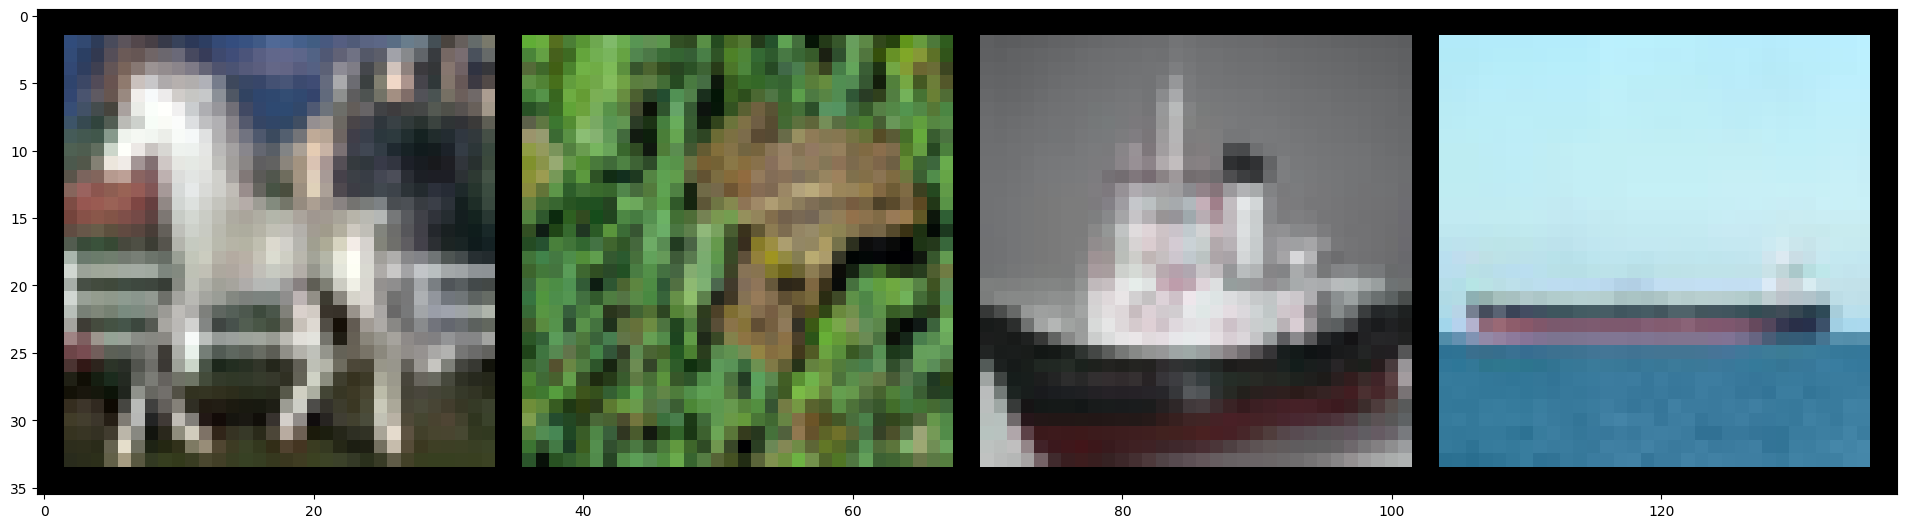

In [10]:
import matplotlib.pyplot as plt

def imshow(img):
  np_img=img.numpy()
  plt.imshow(np.transpose(np_img,(1,2,0)))
  plt.show()

plt.figure(figsize=(24,12))
imshow(torchvision.utils.make_grid(images))

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as f

import torch.optim as optim
import torchvision

In [168]:
class MonoLayerPerceptron(nn.Module):
    def __init__(self):
        super(MonoLayerPerceptron, self).__init__()
        self.fc = nn.Linear(3 * 32 * 32, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)  #so we  Flatten the input
        x = self.fc(x)
        return x


**Gradients provide information on how the loss would change with respect to each parameter in the model**
fwe set it to 0 so the model can focus on the gradients computed in the current iteration and helps prevent unintended side effects due to the accumulation of gradients over time.

**logits**
The output of the model is commonly referred to as logits Logits are the raw scores or unnormalized predictions produced by the model before the final activation function (e.g., softmax) is applied.

In [169]:
mono_layer_model = MonoLayerPerceptron()
# Training loop
for epoch in range(10):
    running_loss = 0.0
    for i, batch in enumerate(train_dataloader, 0):
        images, labels = batch
        optimizer.zero_grad()
        logits = mono_layer_model(images)
        loss = loss_function(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5}], loss {running_loss / 2000:.3f}')
            running_loss = 0.0  # Reset running_loss for the next batch

print('Finished training')


[1,  2000], loss 2.352
[1,  4000], loss 2.353
[1,  6000], loss 2.357
[1,  8000], loss 2.357
[1, 10000], loss 2.352
[1, 12000], loss 2.355
[2,  2000], loss 2.356
[2,  4000], loss 2.354
[2,  6000], loss 2.355
[2,  8000], loss 2.357
[2, 10000], loss 2.348
[2, 12000], loss 2.353
[3,  2000], loss 2.351
[3,  4000], loss 2.353
[3,  6000], loss 2.356
[3,  8000], loss 2.356
[3, 10000], loss 2.353
[3, 12000], loss 2.358
[4,  2000], loss 2.351
[4,  4000], loss 2.351
[4,  6000], loss 2.356
[4,  8000], loss 2.357
[4, 10000], loss 2.349
[4, 12000], loss 2.357
[5,  2000], loss 2.354
[5,  4000], loss 2.361
[5,  6000], loss 2.347
[5,  8000], loss 2.356
[5, 10000], loss 2.346
[5, 12000], loss 2.356
[6,  2000], loss 2.354
[6,  4000], loss 2.350
[6,  6000], loss 2.355
[6,  8000], loss 2.353
[6, 10000], loss 2.356
[6, 12000], loss 2.356
[7,  2000], loss 2.360
[7,  4000], loss 2.353
[7,  6000], loss 2.357
[7,  8000], loss 2.353
[7, 10000], loss 2.352
[7, 12000], loss 2.348
[8,  2000], loss 2.356
[8,  4000],

**pool** effectively reduces the spatial dimensions of the input tensor while retaining the most relevant information.

numbers 3, 6, 16 represent the number of channels in the input and output tensors of each convolutional layer.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class ImprovedImageClassifier(nn.Module):
    def __init__(self):
        super(ImprovedImageClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        # First hidden layer
        self.fc1 = nn.Linear(16 * 5 * 5, 512)
        self.bn1 = nn.BatchNorm1d(512)  # Batch normalization
        self.dropout1 = nn.Dropout(0.2)

        # Second hidden layer
        self.fc2 = nn.Linear(512, 512)
        self.bn2 = nn.BatchNorm1d(512)  # Batch normalization
        self.dropout2 = nn.Dropout(0.2)

        # Output layer
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)

        # First hidden layer
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)

        # Second hidden layer
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)

        # Output layer
        x = self.fc3(x)
        return x


In [17]:
import matplotlib.pyplot as plt

# Create an instance of the ImprovedImageClassifier
improved_model = ImprovedImageClassifier()

# Define the optimizer and loss function
optimizer = torch.optim.SGD(improved_model.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

# Lists to store loss values
epoch_losses = []

# Training loop
for epoch in range(10):
    running_loss = 0.0
    for i, batch in enumerate(train_dataloader, 0):
        images, labels = batch
        optimizer.zero_grad()
        logits = improved_model(images)
        loss = loss_function(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5}], loss {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Store the average loss for the epoch
    epoch_loss = running_loss / len(train_dataloader)
    epoch_losses.append(epoch_loss)

print('Finished training')




[1,  2000], loss 2.148
[1,  4000], loss 2.013
[1,  6000], loss 1.961
[1,  8000], loss 1.929
[1, 10000], loss 1.904
[1, 12000], loss 1.856
[2,  2000], loss 1.820
[2,  4000], loss 1.794
[2,  6000], loss 1.807
[2,  8000], loss 1.788
[2, 10000], loss 1.778
[2, 12000], loss 1.754
[3,  2000], loss 1.725
[3,  4000], loss 1.732
[3,  6000], loss 1.731
[3,  8000], loss 1.733
[3, 10000], loss 1.717
[3, 12000], loss 1.698
[4,  2000], loss 1.674
[4,  4000], loss 1.683
[4,  6000], loss 1.687
[4,  8000], loss 1.647
[4, 10000], loss 1.685
[4, 12000], loss 1.658
[5,  2000], loss 1.651
[5,  4000], loss 1.636
[5,  6000], loss 1.634
[5,  8000], loss 1.643
[5, 10000], loss 1.604
[5, 12000], loss 1.623
[6,  2000], loss 1.599
[6,  4000], loss 1.604
[6,  6000], loss 1.602
[6,  8000], loss 1.607
[6, 10000], loss 1.600
[6, 12000], loss 1.567
[7,  2000], loss 1.574
[7,  4000], loss 1.588
[7,  6000], loss 1.556
[7,  8000], loss 1.566
[7, 10000], loss 1.550
[7, 12000], loss 1.565
[8,  2000], loss 1.560
[8,  4000],

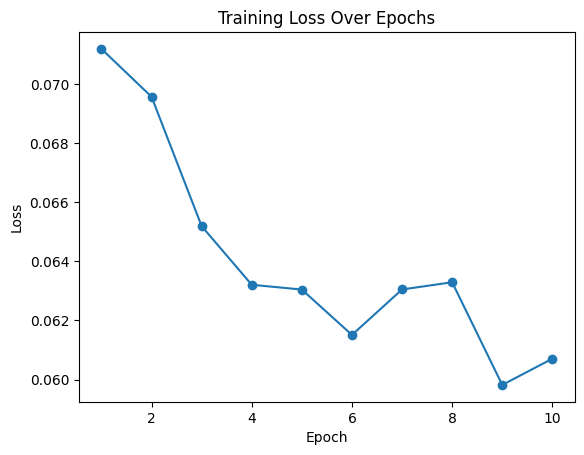

In [173]:
# Visualize the loss curve
plt.plot(range(1, 11), epoch_losses, marker='o', linestyle='-')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [174]:
o1=(32-5+0)/1+1
o2=o1//2
o3=(o2-5+0)/1+1
o4=o3//2
o1,o2,o3,o4

(28.0, 14.0, 10.0, 5.0)